# Online Retail Data Set
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Source: https://archive.ics.uci.edu/ml/datasets/online+retail

The aim of this analysis is to use data science techniques to answer the following business questions and in so doing showcase my analytical and programming skills to solve business problems.

### PART A
#### 1. Business Metrics
        - Monthly Revenue
        - Monthly Growth Rate
        - Revenue by Country
        - Monthly Active Customers
        - Monthly Orders
        - Average Revenue per Order
    
    
#### 2. Customer Metrics
        - Dividing customers into types : New & Existing Customers
        - Monthly Retention rate
        - Churn rate
        - Cohort-based retention rate



### PART B
#### 3.1 Market Attribution Modelling

        - Markov Chain model
        - First Touch attribution model
        - Last Touch attribution model

#### 3. 2. Comparison of number of conversions attributed to market attribution models
    
    
    
  
  
    
### PART C
#### 4.1 Customer Segmentation
        - RFM Segmentation: Divide customers into segments

#### 4.2 Recommendation






#### Import Packages

In [1]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
from collections import defaultdict
import warnings
import random
from sklearn.cluster import KMeans
random.seed(123)
warnings.filterwarnings('ignore')
%matplotlib inline

# PART A

## 1. BUSINESS METRICS

This section aims at using the combination of programming and data analysis to answer business questions on revenue, growth rate, average revenue per order, etc.

In [2]:
tx_data = pd.read_csv('OnlineRetail.csv',encoding = "ISO-8859-1")
tx_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate'])

In [4]:
#tx_data['InvoiceYearMonth'] = [str(x) + str(y) + z for x, y, z in zip(tx_data['InvoiceDate'].dt.year, tx_data['InvoiceDate'].dt.month, tx_data['InvoiceDate'].dt.strftime('%b'))]
tx_data['InvoiceYearMonth'] = tx_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)
tx_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012


In [5]:
tx_data['Revenue'] = tx_data['UnitPrice'] * tx_data['Quantity']

## 1.1 Monthly Revenue

In [6]:
tx_data.groupby('InvoiceYearMonth')['Revenue'].sum()

InvoiceYearMonth
201012     748957.020
201101     560000.260
201102     498062.650
201103     683267.080
201104     493207.121
201105     723333.510
201106     691123.120
201107     681300.111
201108     682680.510
201109    1019687.622
201110    1070704.670
201111    1461756.250
201112     433668.010
Name: Revenue, dtype: float64

In [7]:
tx_revenue = tx_data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()

In [8]:
tx_revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


Text(0.5, 1.0, 'Monthly Revenue')

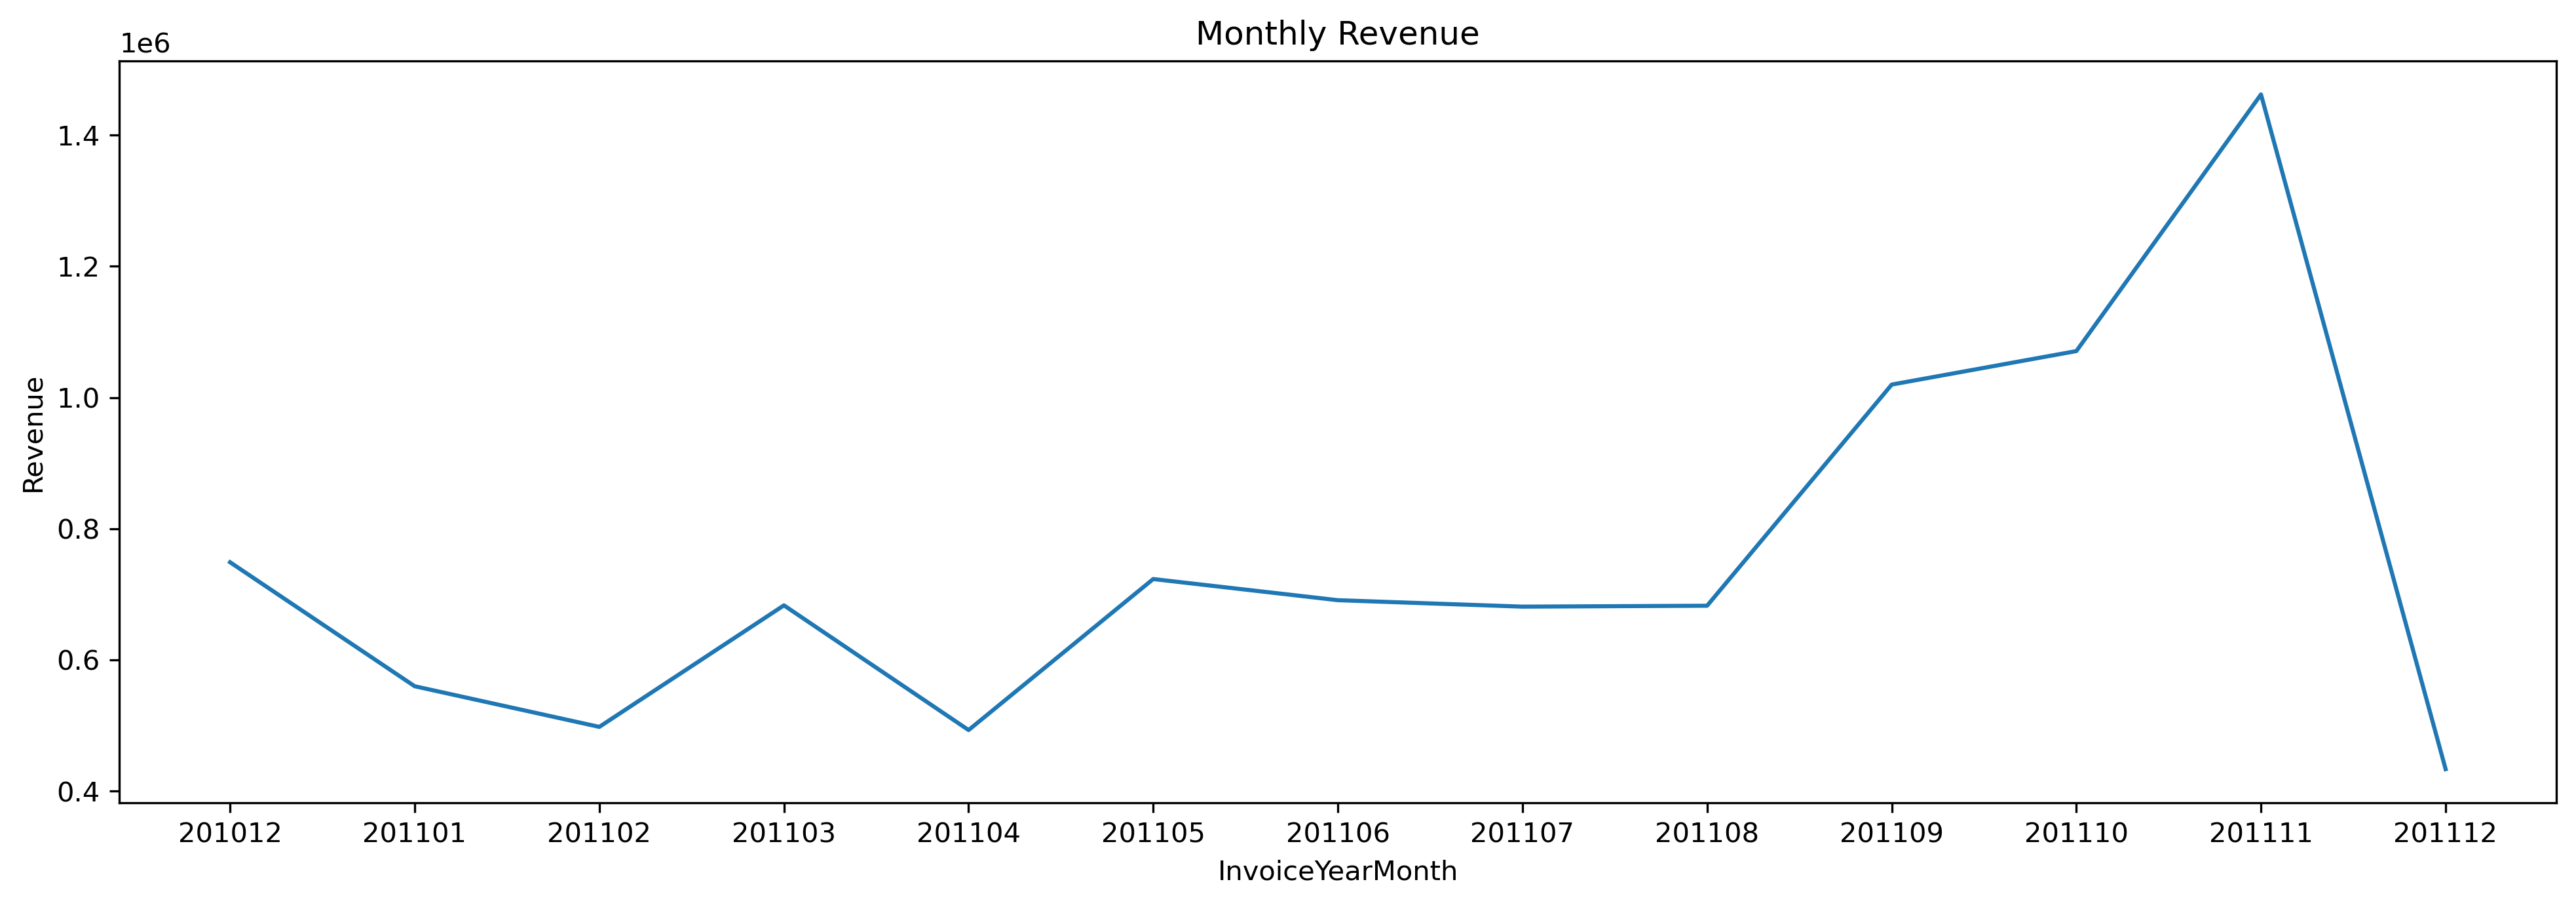

In [9]:
tx_data['InvoiceYearMonth'] = tx_data['InvoiceYearMonth'].astype(str)
tx_revenue["InvoiceYearMonth"] = tx_revenue["InvoiceYearMonth"].astype(str)
#tx_revenue.plot(x='InvoiceYearMonth', y='Revenue', kind='line', ylim=[0,1500000], legend=False, figsize=(16,5))
plt.figure(figsize=(16,5),dpi=300)
#tx_revenue.plot.line(x='InvoiceYearMonth', y='Revenue',ylim=[0,1500000], legend=False,figsize=(16,5))
sns.lineplot(data=tx_revenue, x="InvoiceYearMonth", y="Revenue")
plt.title('Monthly Revenue')

## 1.2 Monthly Growth Rate

In [10]:
tx_revenue['MonthlyGrowth'] = round(tx_revenue['Revenue'].pct_change(),2)
tx_revenue.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.25
2,201102,498062.650,-0.11
3,201103,683267.080,0.37
4,201104,493207.121,-0.28


Text(0.5, 1.0, 'Monthly Growth Rate')

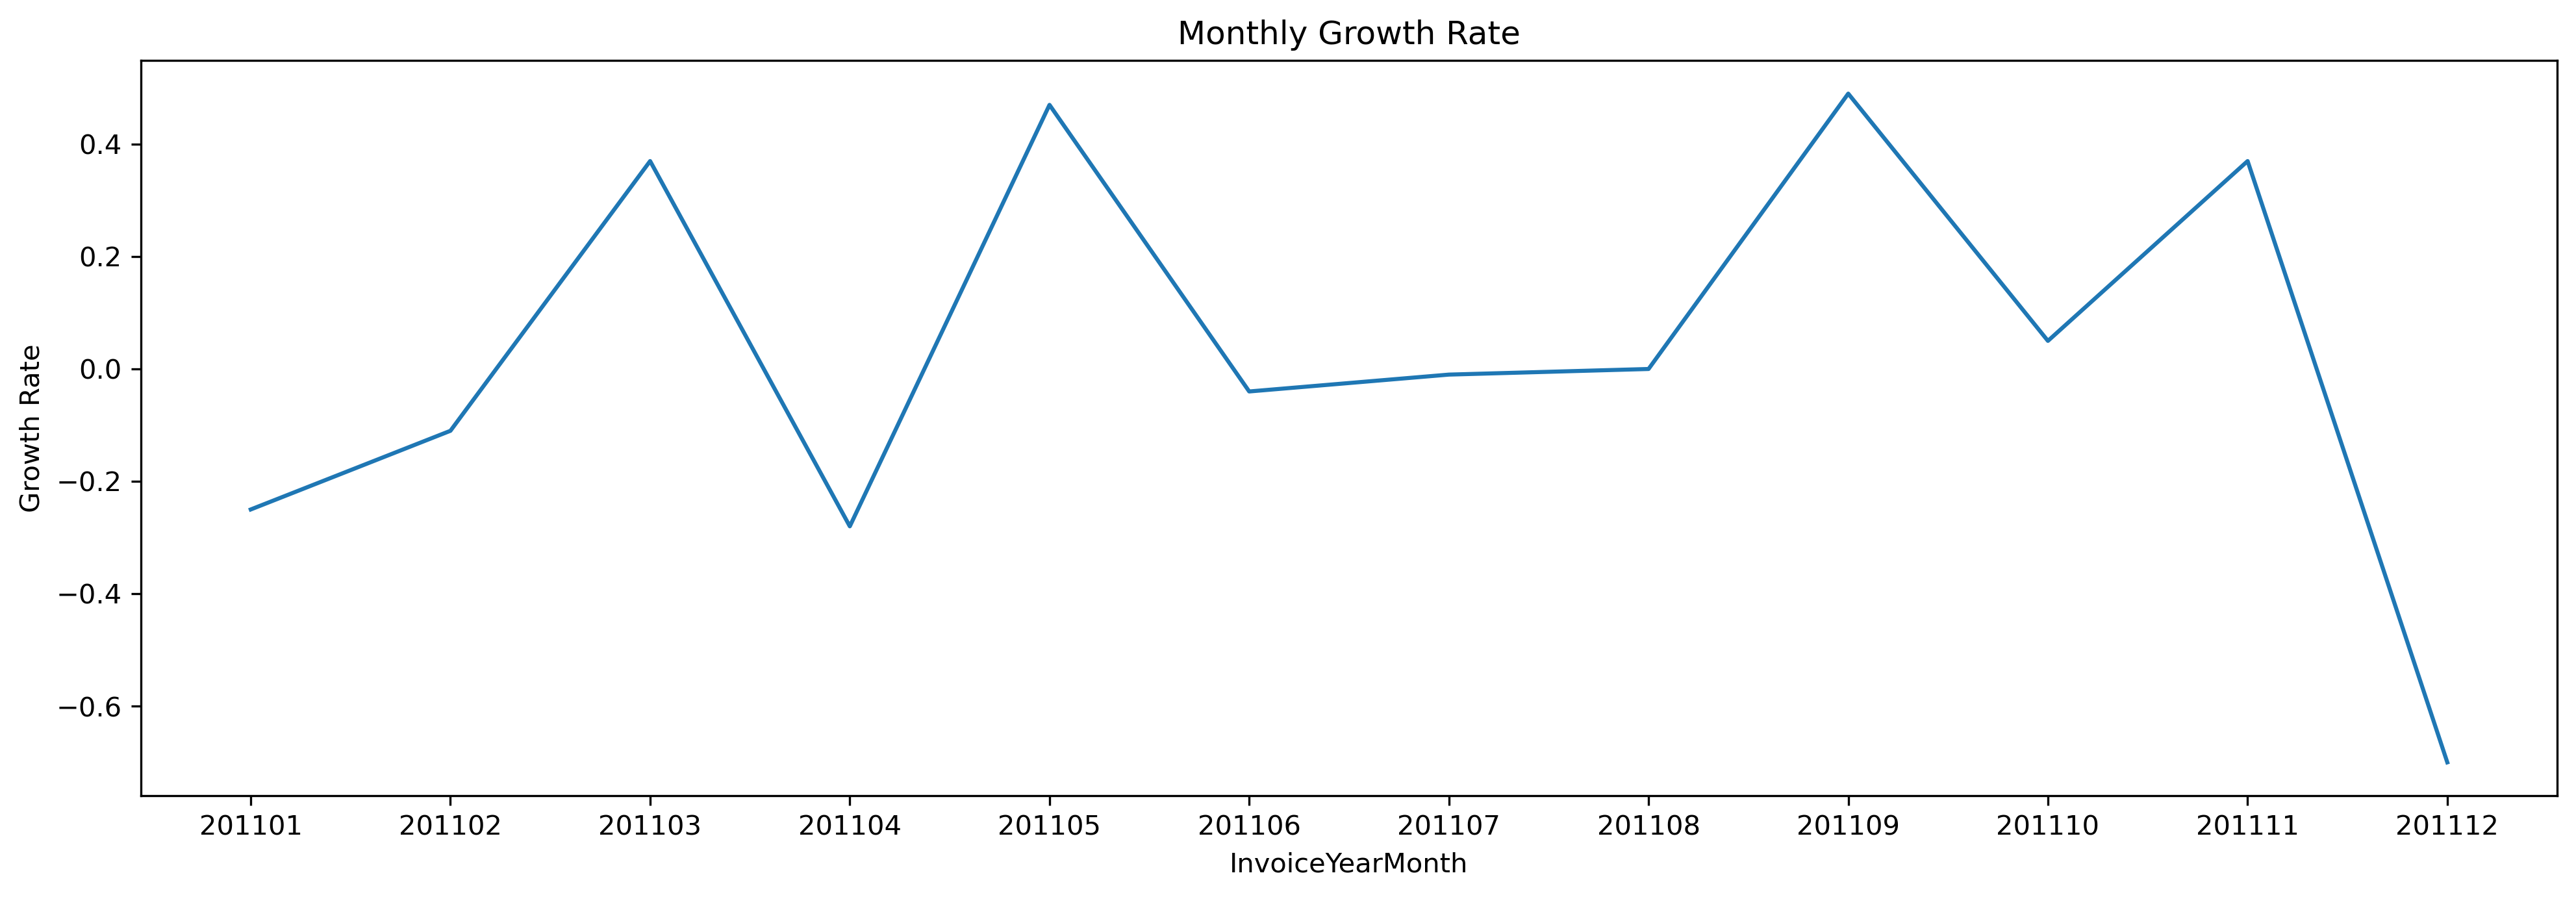

In [11]:
#tx_revenue.plot(x='InvoiceYearMonth', y='MonthlyGrowth', kind='line', legend=False, figsize=(16,5))
plt.figure(figsize=(16,5),dpi=300)
#tx_revenue.plot.line(x='InvoiceYearMonth', y='Revenue',ylim=[0,1500000], legend=False,figsize=(16,5))
sns.lineplot(data=tx_revenue, x="InvoiceYearMonth", y="MonthlyGrowth")
#tx_revenue.plot.line(x='InvoiceYearMonth', y='MonthlyGrowth',legend=False, figsize=(16,5))
plt.ylabel('Growth Rate')
plt.title('Monthly Growth Rate')

We experienced lowest drop in revenue (28%) in April, 2011 and we need to identify what exactly happened. 

We ask questions such as: was it due to less active customers or our customers did less orders? Maybe they just started to buy cheaper products?

## 1.3 Revenue by Country

In [12]:
tx_data.groupby('Country')['Revenue'].sum().sort_values(ascending=False).astype(int)

Country
United Kingdom          8187806
Netherlands              284661
EIRE                     263276
Germany                  221698
France                   197403
Australia                137077
Switzerland               56385
Spain                     54774
Belgium                   40910
Sweden                    36595
Japan                     35340
Norway                    35163
Portugal                  29367
Finland                   22326
Channel Islands           20086
Denmark                   18768
Italy                     16890
Cyprus                    12946
Austria                   10154
Hong Kong                 10117
Singapore                  9120
Israel                     7907
Poland                     7213
Unspecified                4749
Greece                     4710
Iceland                    4309
Canada                     3666
Malta                      2505
United Arab Emirates       1902
USA                        1730
Lebanon                    1693


Since majority of the revenue is from United Kingdom, i will focus on this country henceforth to make the analysis easy to follow.

In [13]:
tx_uk = tx_data[tx_data['Country'] == 'United Kingdom']
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


## Focus on sales from United Kingdom

## 1.4 Monthly Active Customers

In [14]:
tx_monthly_active = tx_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
tx_monthly_active.columns = ['InvoiceYearMonth', 'NumberOfCustomers']
tx_monthly_active

,InvoiceYearMonth,NumberOfCustomers
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


In April, Monthly Active Customer number dropped to 817 from 923 (-11.5%).

Text(0, 0.5, '# of customers')

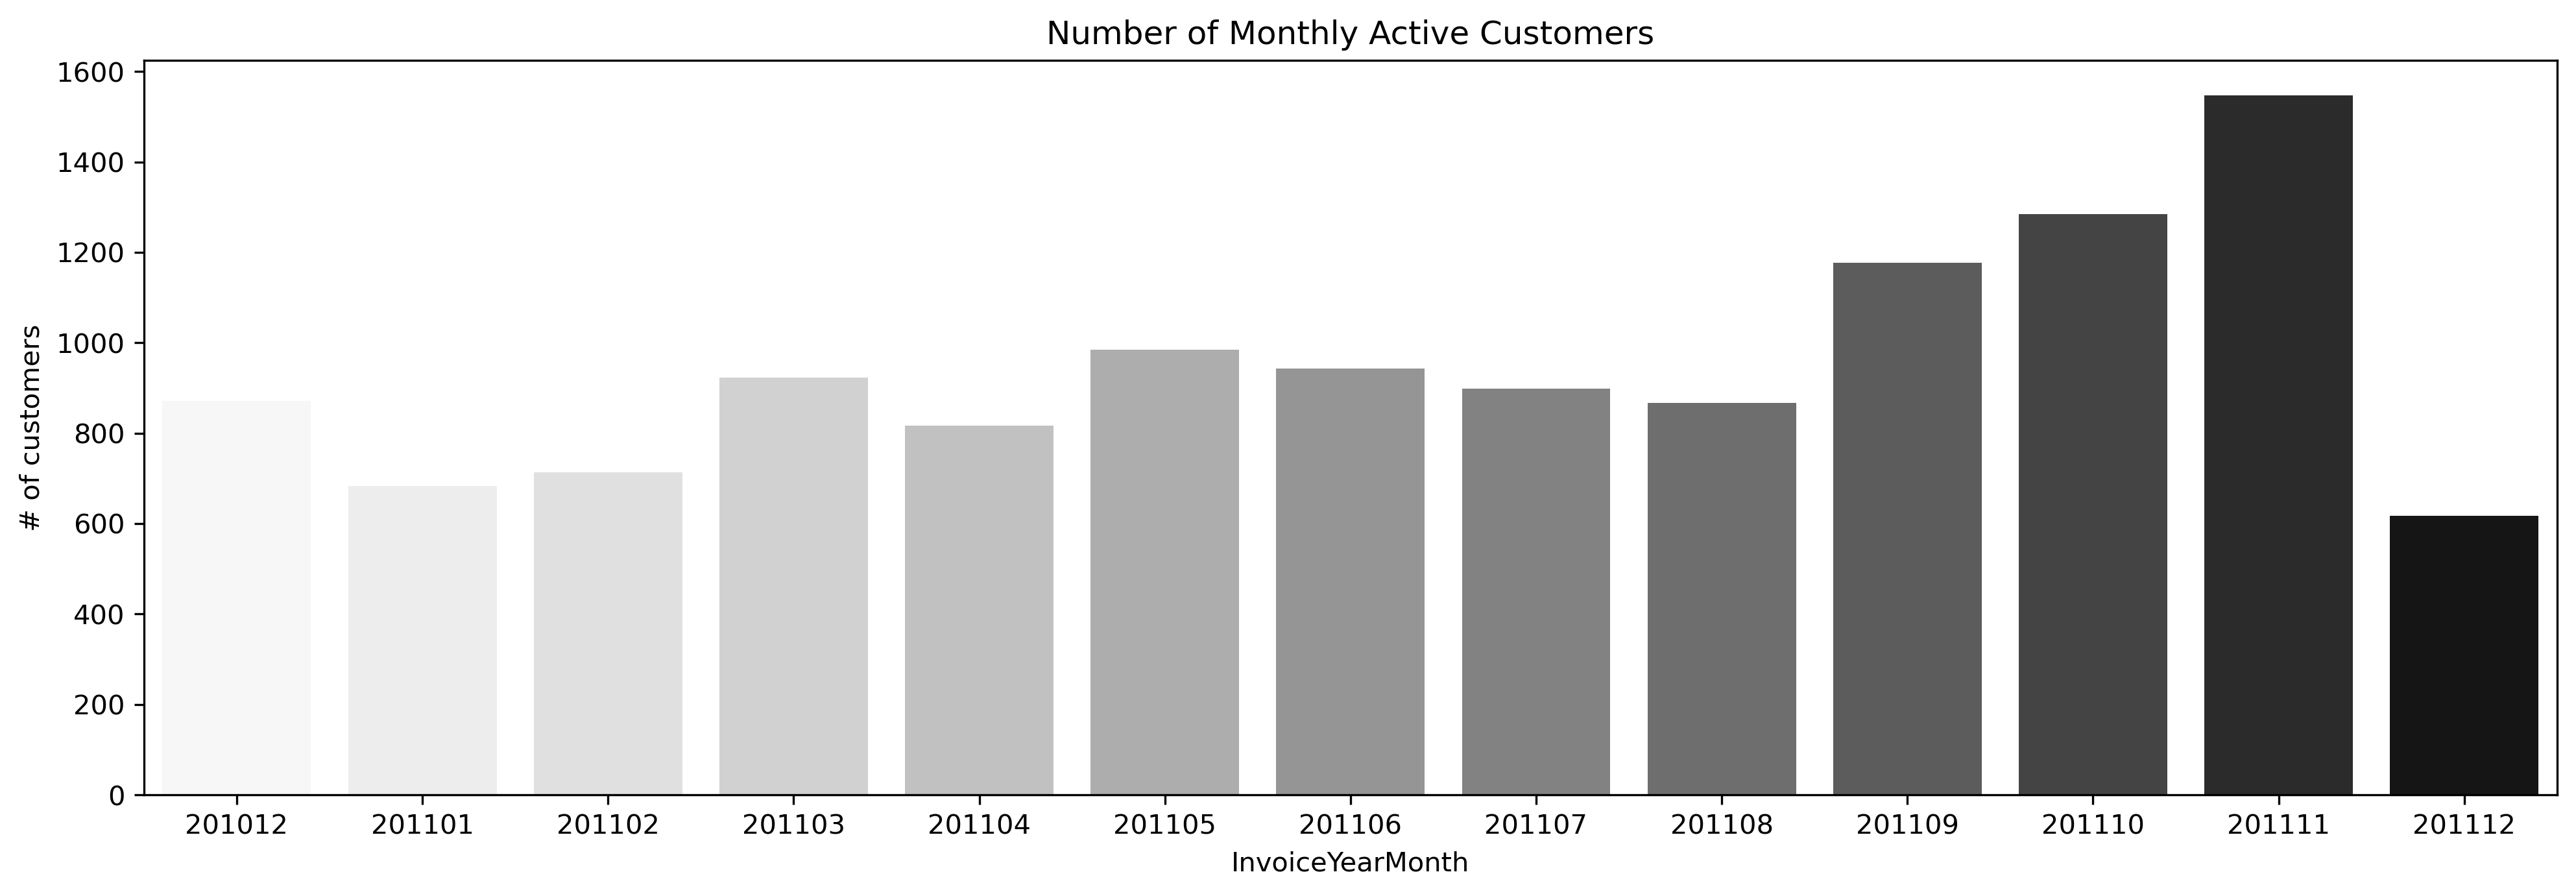

In [15]:
#tx_monthly_active.plot(x='InvoiceYearMonth', y='NumberOfCustomers',kind='bar',figsize=(16,5), legend=False)
#plt.title('Number of Monthly Active Customers')

plt.figure(figsize=[16,5],dpi = 300)
plt.title('Number of Monthly Active Customers')
sns.barplot(x='InvoiceYearMonth', y='NumberOfCustomers', data=tx_monthly_active, palette="Greys")
plt.ylabel('# of customers')


## 1.5 Monthly Orders

In [16]:
tx_monthly_orders = tx_uk.groupby('InvoiceYearMonth')['InvoiceNo'].nunique().reset_index()
tx_monthly_orders.columns = ['InvoiceYearMonth', 'NumberOfOrders']
tx_monthly_orders

,InvoiceYearMonth,NumberOfOrders
0,201012,1885
1,201101,1327
2,201102,1259
3,201103,1802
4,201104,1622
5,201105,1973
6,201106,1830
7,201107,1764
8,201108,1546
9,201109,2090


As we expected, Number of Orders also declined in April (1802 to 1622, about 10% decrease.)
We know that Number of Active Customer directly affected Number of Orders decrease. At the end, we should definitely check our Average Revenue per Order as well.

Text(0, 0.5, 'Number of orders')

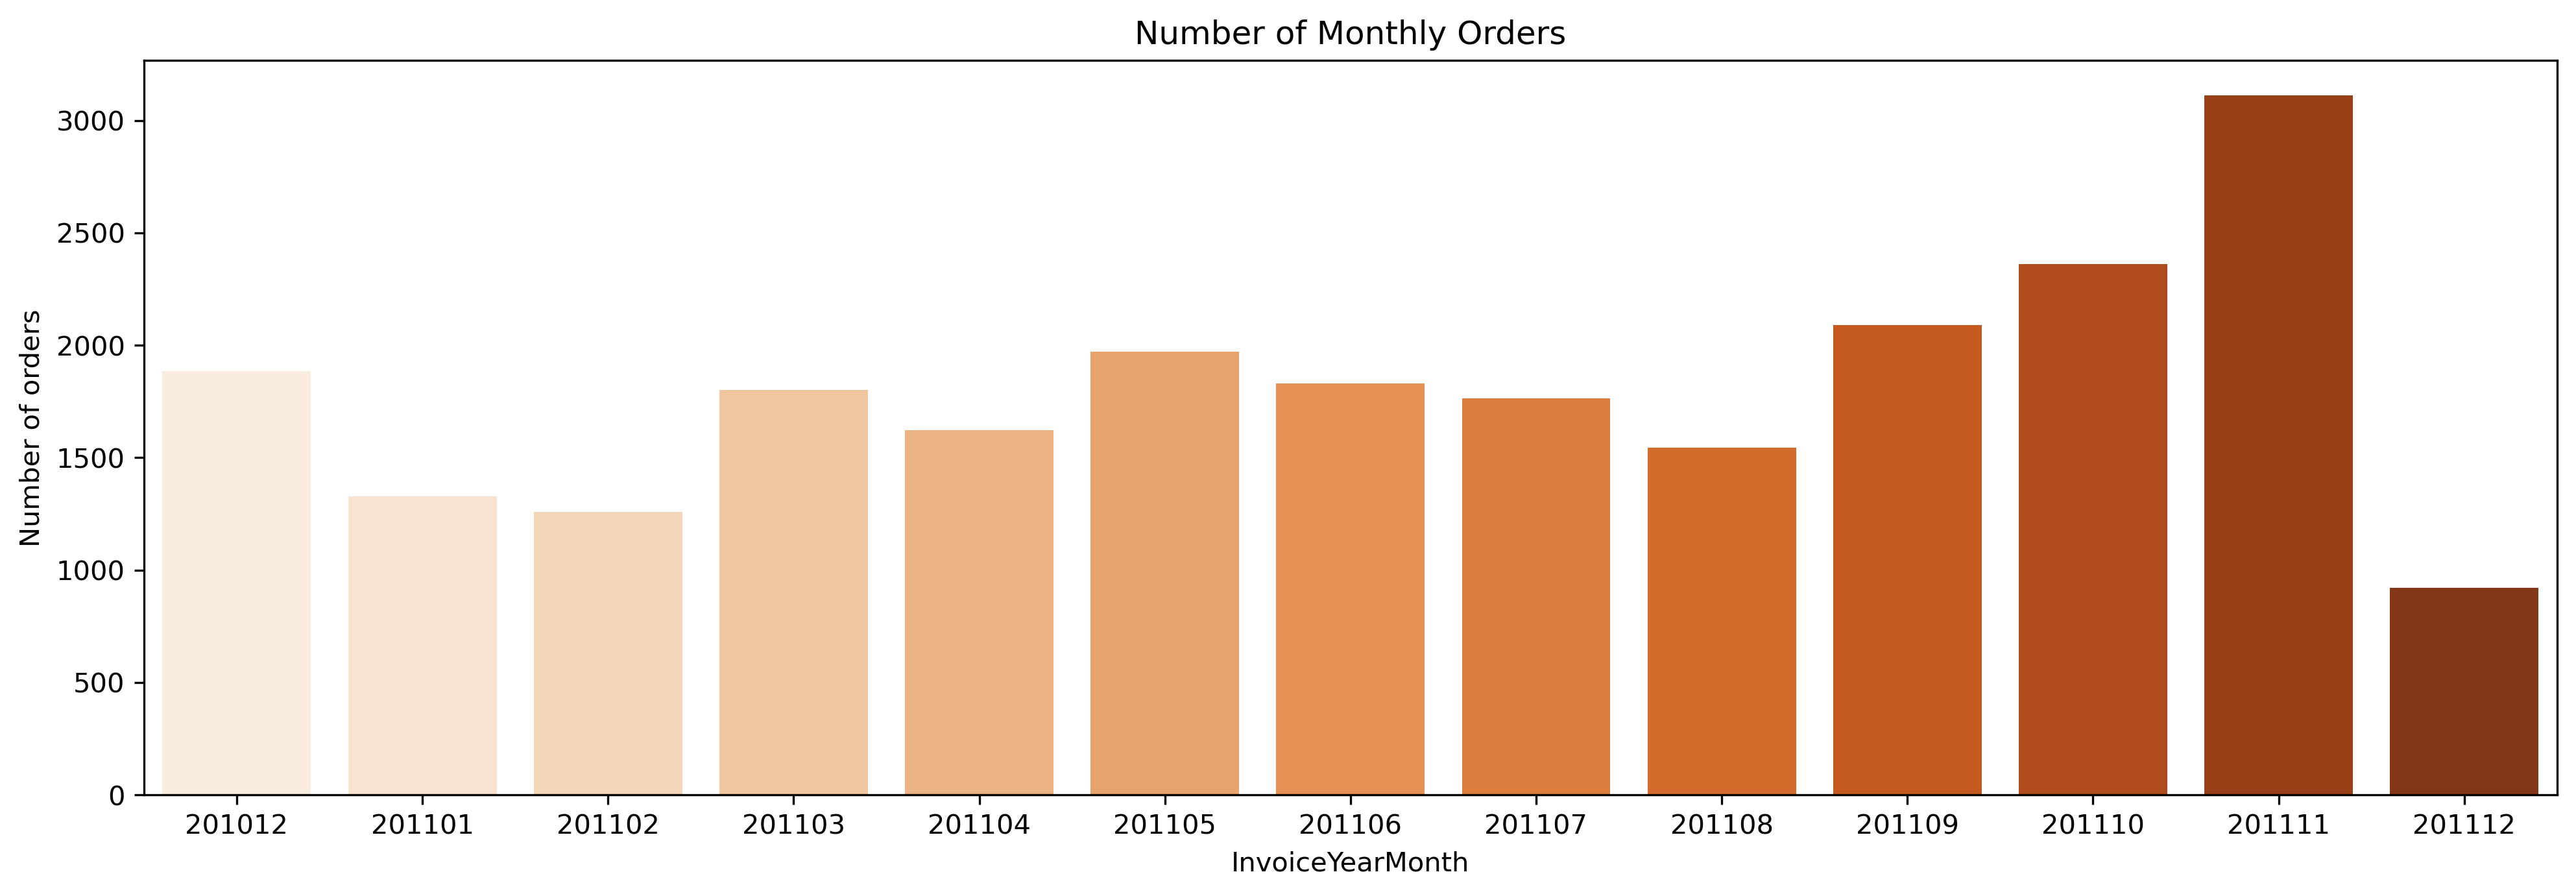

In [17]:
#tx_monthly_orders.plot(x='InvoiceYearMonth', y='NumberOfOrders',kind='bar',figsize=(16,5), legend=False)
#plt.title('Number of Monthly Orders')
plt.figure(figsize=[16,5],dpi = 300)
plt.title('Number of Monthly Orders')
sns.barplot(x='InvoiceYearMonth', y='NumberOfOrders', data=tx_monthly_orders, palette="Oranges")
plt.ylabel('Number of orders')

## 1.6 Monthly Average Revenue per Order

In [18]:
tx_uk_monthly = tx_uk.groupby('InvoiceYearMonth')['Revenue'].sum().reset_index()
tx_monthly_order_avg = tx_uk_monthly.merge(tx_monthly_orders, on='InvoiceYearMonth', how='inner')

In [19]:
tx_monthly_order_avg['AverageMonthlyRevenuePerOrder'] = round(tx_monthly_order_avg['Revenue']/tx_monthly_order_avg['NumberOfOrders'],2)
tx_monthly_order_avg

,InvoiceYearMonth,Revenue,NumberOfOrders,AverageMonthlyRevenuePerOrder
0,201012,676742.620,1885,359.01
1,201101,434308.300,1327,327.29
2,201102,408247.910,1259,324.26
3,201103,559707.390,1802,310.60
4,201104,442254.041,1622,272.66
5,201105,596459.860,1973,302.31
6,201106,554478.350,1830,302.99
7,201107,565479.841,1764,320.57
8,201108,539130.500,1546,348.73
9,201109,862018.152,2090,412.45


Even the monthly average revenue per order dropped for April (310 to 272).

Text(0, 0.5, 'Average Revenue')

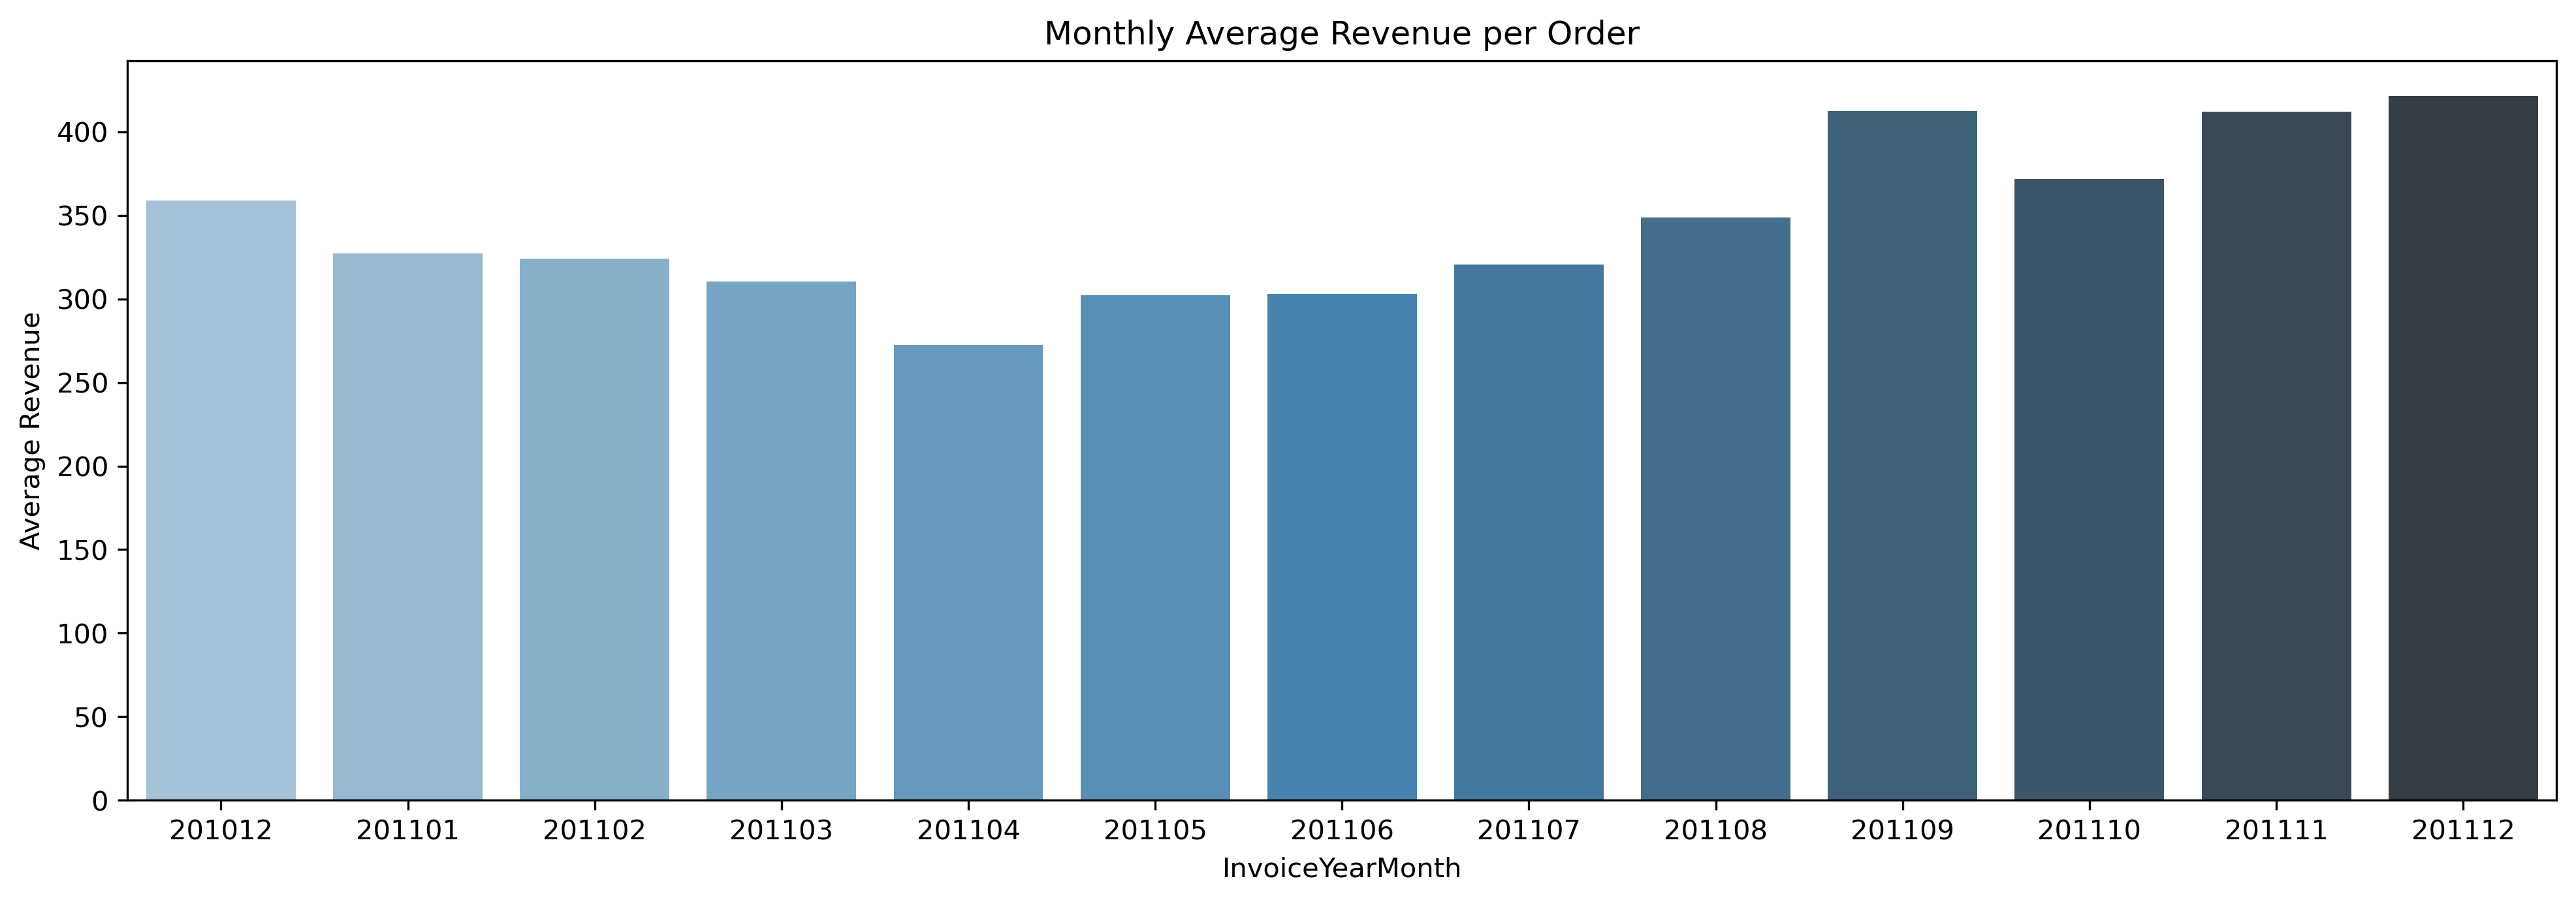

In [20]:
plt.figure(figsize=[16,5],dpi = 300)
plt.title('Monthly Average Revenue per Order')
sns.barplot(x='InvoiceYearMonth', y='AverageMonthlyRevenuePerOrder', data=tx_monthly_order_avg, palette="Blues_d")
plt.ylabel('Average Revenue')
#sns.catplot(x='InvoiceYearMonth', y='AverageMonthlyRevenuePerOrder', kind="bar", data=tx_monthly_order_avg)
#tx_monthly_order_avg.plot(x='InvoiceYearMonth', y='AverageMonthlyRevenuePerOrder',kind='bar',figsize=(16,5), legend=False)


## 2. CUSTOMER METRICS

In this section, we are concerned about types of customers such as First-time and Returning Customers: their monthly number, revenue and so on.

In [21]:
tx_min_purchase = tx_uk.groupby('CustomerID').InvoiceDate.min().reset_index()

In [22]:
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']

In [23]:
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

In [24]:
tx_uk = pd.merge(tx_uk, tx_min_purchase, on='CustomerID')

In [25]:
tx_uk['UserType'] = 'First-time'
tx_uk['InvoiceYearMonth'] = tx_uk['InvoiceYearMonth'].astype(int)
tx_uk.loc[tx_uk['InvoiceYearMonth']>tx_uk['MinPurchaseYearMonth'],'UserType'] = 'Returning'

## 2.1 Number of customers by type

In [26]:
tx_uk.groupby('UserType')['CustomerID'].nunique()

UserType
First-time    3950
Returning     2530
Name: CustomerID, dtype: int64

In [27]:
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,First-time
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,First-time
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,First-time
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,First-time
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,First-time


In [28]:
tx_user_type_revenue = tx_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()
tx_user_type_revenue['InvoiceYearMonth'] = tx_user_type_revenue['InvoiceYearMonth'].astype(str)

## 2.2 Revenue per month for new and existing customers

In [29]:
tx_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")

,InvoiceYearMonth,UserType,Revenue
0,201012,First-time,483799.740
1,201101,First-time,156705.770
2,201101,Returning,195275.510
3,201102,First-time,127859.000
4,201102,Returning,220994.630
5,201103,First-time,160567.840
6,201103,Returning,296350.030
7,201104,First-time,108517.751
8,201104,Returning,268226.660
9,201105,First-time,90847.490


Text(0.5, 1.0, 'Monthly Revenue for First-time and Returning Customers')

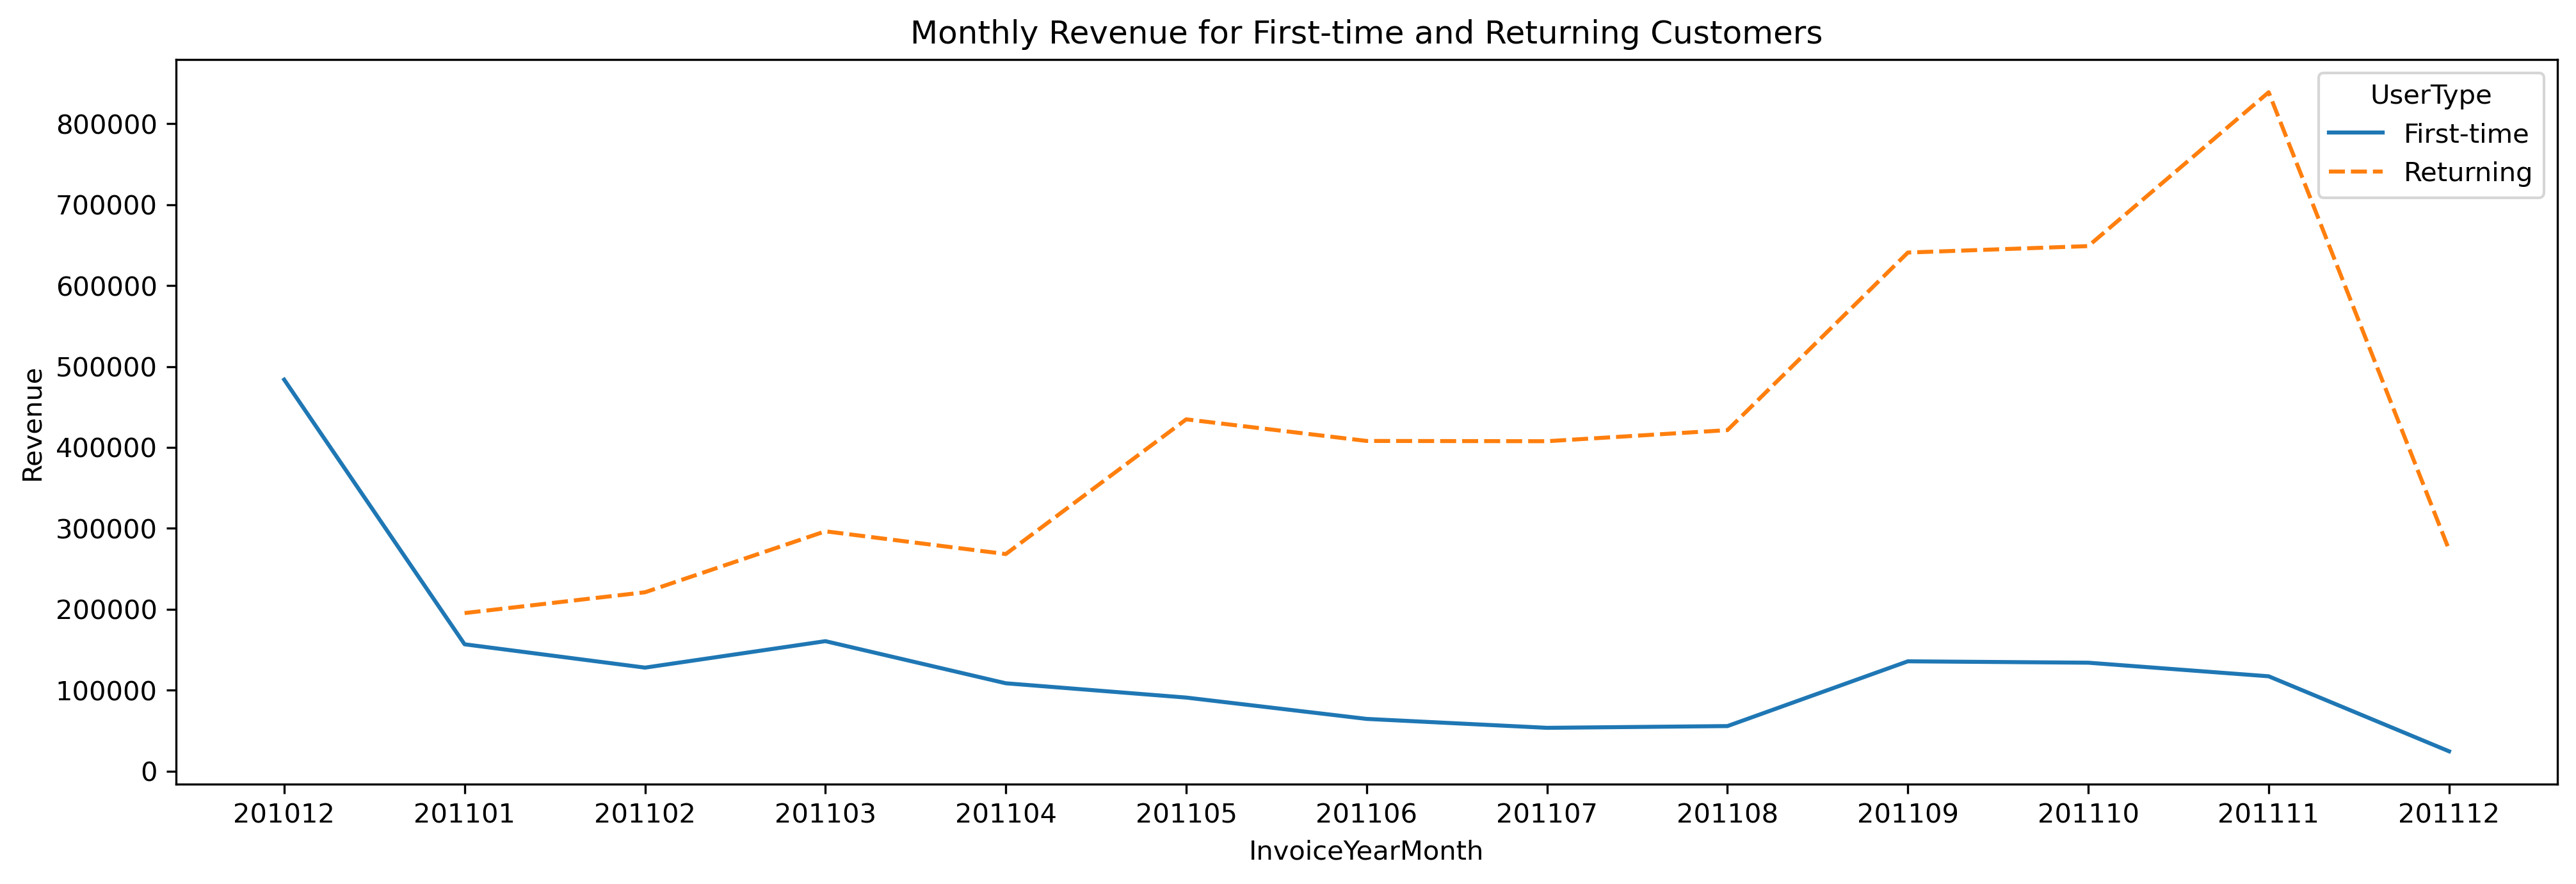

In [30]:
plt.figure(figsize=[16,5], dpi = 300)
sns.lineplot(data=tx_user_type_revenue, x="InvoiceYearMonth", y="Revenue", hue="UserType", style="UserType")
plt.title('Monthly Revenue for First-time and Returning Customers')

#### Number of First-time Customers by Month

In [31]:
tx_uk.query("UserType == 'First-time'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()

InvoiceYearMonth
201012    871
201101    362
201102    339
201103    408
201104    276
201105    252
201106    207
201107    172
201108    140
201109    275
201110    318
201111    296
201112     34
Name: CustomerID, dtype: int64

#### Number of Returning Customers by Month

In [32]:
tx_uk.query("UserType == 'Returning'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()

InvoiceYearMonth
201101     322
201102     375
201103     515
201104     541
201105     733
201106     736
201107     727
201108     727
201109     902
201110     967
201111    1252
201112     583
Name: CustomerID, dtype: int64

## 2.3. Customer Signup Date

In [33]:
tx_min_purchase.head()

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101


In [34]:
unq_month_year =  tx_min_purchase.MinPurchaseYearMonth.unique()

In [35]:
def generate_signup_date(year_month):
    signup_date = [el for el in unq_month_year if year_month >= el]
    return np.random.choice(signup_date)

In [36]:
tx_min_purchase['SignupYearMonth'] = tx_min_purchase.apply(lambda row: generate_signup_date(row['MinPurchaseYearMonth']),axis=1)

In [37]:
tx_min_purchase['InstallYearMonth'] = tx_min_purchase.apply(lambda row: generate_signup_date(row['SignupYearMonth']),axis=1)

In [38]:
tx_min_purchase.head()

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth,SignupYearMonth,InstallYearMonth
0,12346.0,2011-01-18 10:01:00,201101,201012,201012
1,12747.0,2010-12-05 15:38:00,201012,201012,201012
2,12748.0,2010-12-01 12:48:00,201012,201012,201012
3,12749.0,2011-05-10 15:25:00,201105,201103,201102
4,12820.0,2011-01-17 12:34:00,201101,201012,201012


## 2.4 Monthly Retention Rate

Retention rate should be monitored very closely because it indicates how sticky is your service and how well the product fits the market. 

For making Monthly Retention Rate visualized, we need to calculate how many customers retained from previous month.


Monthly Retention Rate = Retained Customers From Prev. Month / Total Active Customers


In [39]:
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,First-time
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,First-time
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,First-time
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,First-time
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,First-time


In [40]:
df_monthly_active = tx_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

In [41]:
tx_user_purchase = tx_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().astype(int).reset_index()

In [42]:
tx_user_purchase

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,201101,0
1,12747.0,201012,706
2,12747.0,201101,303
3,12747.0,201103,310
4,12747.0,201105,771
...,...,...,...
12325,18283.0,201110,114
12326,18283.0,201111,651
12327,18283.0,201112,208
12328,18287.0,201105,765


In [43]:
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()

In [44]:
tx_retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [45]:
months = tx_retention.columns[2:]

In [46]:
months

Index([201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109,
       201110, 201111, 201112],
      dtype='object', name='InvoiceYearMonth')

In [47]:
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)

In [48]:
tx_retention = pd.DataFrame(retention_array)

In [49]:
tx_retention.head()

,InvoiceYearMonth,TotalUserCount,RetainedUserCount
0,201102,714,263
1,201103,923,305
2,201104,817,310
3,201105,985,369
4,201106,943,417


In [50]:
tx_retention['RetentionRate'] = round(tx_retention['RetainedUserCount']/tx_retention['TotalUserCount'],1)

In [51]:
tx_retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201102,714,263,0.4
1,201103,923,305,0.3
2,201104,817,310,0.4
3,201105,985,369,0.4
4,201106,943,417,0.4
5,201107,899,379,0.4
6,201108,867,391,0.5
7,201109,1177,417,0.4
8,201110,1285,502,0.4
9,201111,1548,616,0.4


Monthly Retention Rate significantly jumped from June to August and went back to previous levels afterwards.

Text(0.5, 1.0, 'Monthly Retention Rate')

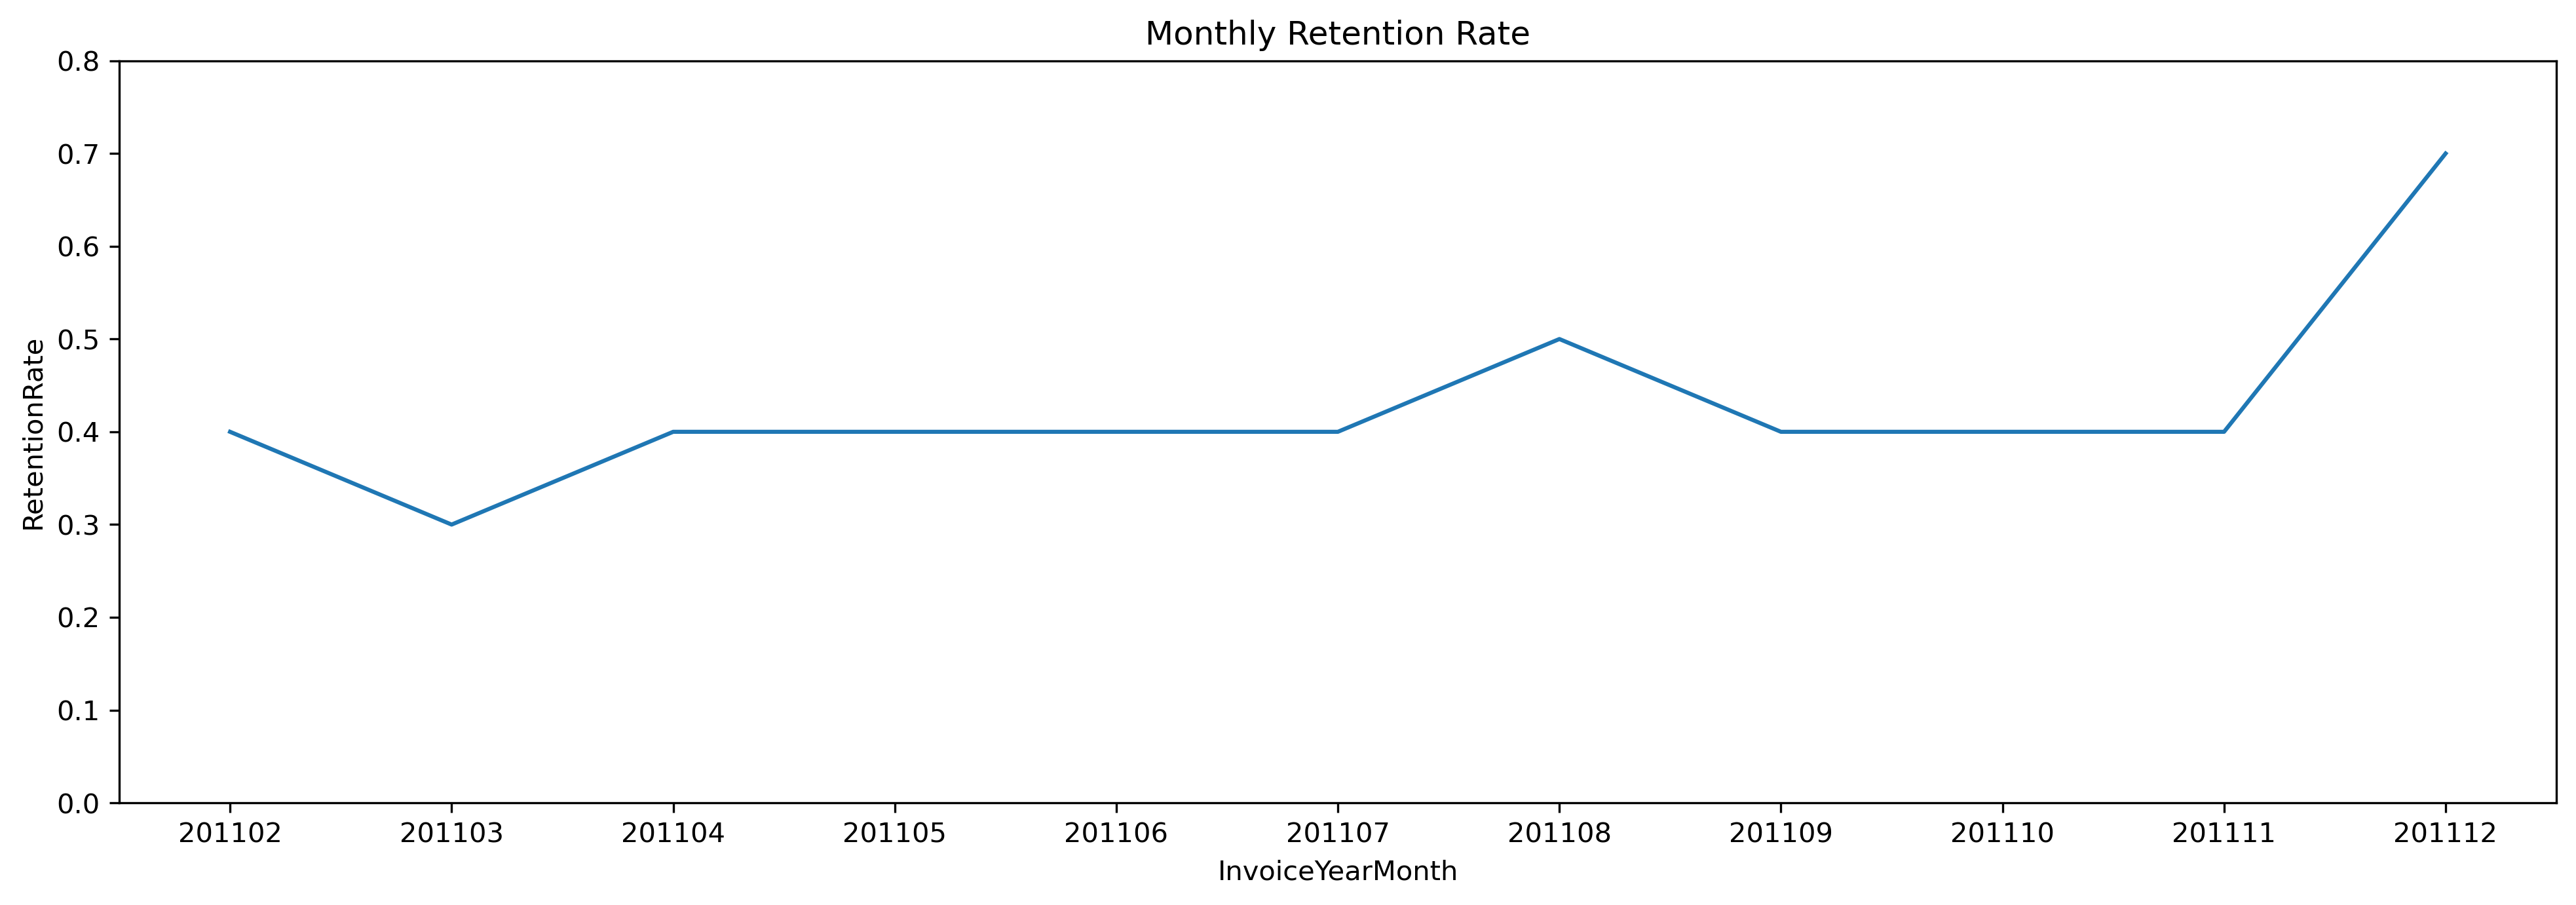

In [52]:
txx_retention = tx_retention.copy()
txx_retention['InvoiceYearMonth'] = txx_retention['InvoiceYearMonth'].astype(str)
plt.figure(figsize=[16,5], dpi = 300)
sns.lineplot(data=txx_retention, x="InvoiceYearMonth", y="RetentionRate")
plt.ylim([0,0.8])
plt.title('Monthly Retention Rate')

## 2.5 Churn Rate

Churn rate refers to the percentange of customers from the preevious month that do not purchase in the next month.

To make it easier, i define the timeline for churn to be the previous month, so that

        churn rate + retention rate = 1
        
Hence,

        churn rate = 1 - retention rate

In [53]:
txx_retention['ChurnRate'] =  1 - tx_retention['RetentionRate']
txx_retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate,ChurnRate
0,201102,714,263,0.4,0.6
1,201103,923,305,0.3,0.7
2,201104,817,310,0.4,0.6
3,201105,985,369,0.4,0.6
4,201106,943,417,0.4,0.6
5,201107,899,379,0.4,0.6
6,201108,867,391,0.5,0.5
7,201109,1177,417,0.4,0.6
8,201110,1285,502,0.4,0.6
9,201111,1548,616,0.4,0.6


Text(0.5, 1.0, 'Monthly Churn Rate')

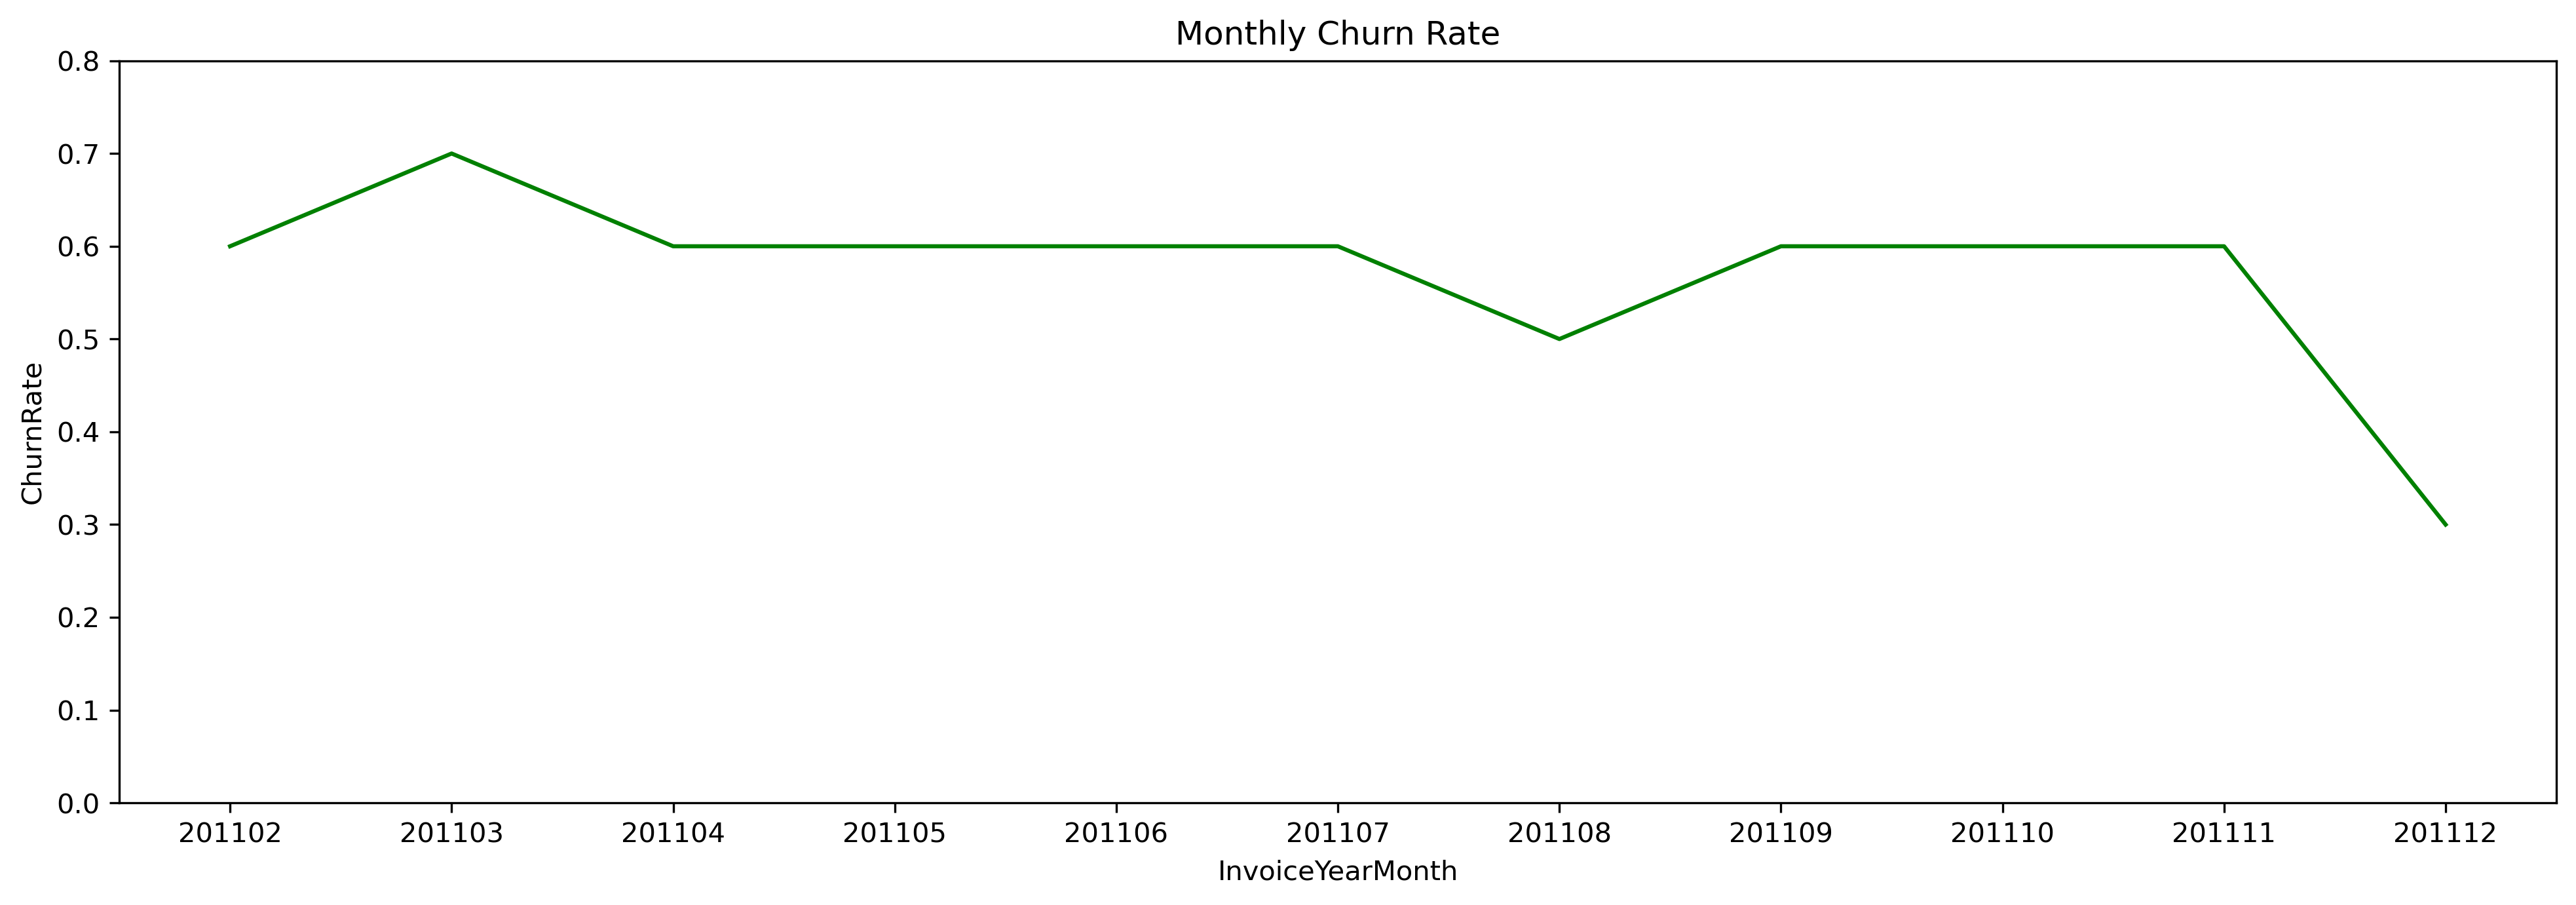

In [54]:
plt.figure(figsize=[16,5], dpi = 300)
sns.lineplot(data=txx_retention, x="InvoiceYearMonth", y="ChurnRate", color='green')
plt.ylim([0, 0.8])
plt.title('Monthly Churn Rate')

## 2.6 Cohort-Based Retention Rate

There is another way of measuring Retention Rate which allows us to see Retention Rate for each cohort. Cohorts are determined as first purchase year-month of the customers. We will be measuring what percentage of the customers retained after their first purchase in each month. This view will help us to see how recent and old cohorts differ regarding retention rate and if recent changes in customer experience affected new customer’s retention or not.

In [55]:
tx_user_purchase.head()

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,201101,0
1,12747.0,201012,706
2,12747.0,201101,303
3,12747.0,201103,310
4,12747.0,201105,771


In [56]:
tx_min_purchase.head()

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth,SignupYearMonth,InstallYearMonth
0,12346.0,2011-01-18 10:01:00,201101,201012,201012
1,12747.0,2010-12-05 15:38:00,201012,201012,201012
2,12748.0,2010-12-01 12:48:00,201012,201012,201012
3,12749.0,2011-05-10 15:25:00,201105,201103,201102
4,12820.0,2011-01-17 12:34:00,201101,201012,201012


In [57]:
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()

In [58]:
tx_retention = pd.merge(tx_retention, tx_min_purchase[['CustomerID','MinPurchaseYearMonth']], on='CustomerID')

In [59]:
tx_retention.head()

,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112,MinPurchaseYearMonth
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0,201101
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1,201012
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1,201012
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1,201105
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1,201101


In [60]:
new_column_names = [ 'm_' + str(column) for column in tx_retention.columns[:-1]]
new_column_names.append('MinPurchaseYearMonth')

In [61]:
tx_retention.columns = new_column_names

In [62]:
tx_retention

,m_CustomerID,m_201012,m_201101,m_201102,m_201103,m_201104,m_201105,m_201106,m_201107,m_201108,m_201109,m_201110,m_201111,m_201112,MinPurchaseYearMonth
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0,201101
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1,201012
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1,201012
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1,201105
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1,201101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0,201103
3946,18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0,201106
3947,18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1,201108
3948,18283.0,0,1,1,0,1,1,1,1,0,1,1,1,1,201101


In [63]:
months

Index([201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109,
       201110, 201111, 201112],
      dtype='object', name='InvoiceYearMonth')

In [64]:
#create the array of Retained users for each cohort monthly
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count = tx_retention[tx_retention.MinPurchaseYearMonth ==  selected_month].MinPurchaseYearMonth.count()
    retention_data['TotalUserCount'] = total_user_count
    retention_data[selected_month] = 1 
    
    query = "MinPurchaseYearMonth == {}".format(selected_month)
    

    for next_month in next_months:
        new_query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(tx_retention.query(new_query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)

In [65]:
tx_retention = pd.DataFrame(retention_array)

In [66]:
len(months)

12

In [67]:
tx_retention.index = months

In [68]:
#tx_retention

In [69]:
t = tx_retention.drop('TotalUserCount', axis=1)
t = t.replace(1.0, np.nan)

#### Interpretation

    23% of customers in January 2011 (201101) repurchase in February
    28% of them repurchase in March
    25% reepurchase in April
    .... and so on

Text(0.5, 1.0, 'Cohort-based Retention Rate')

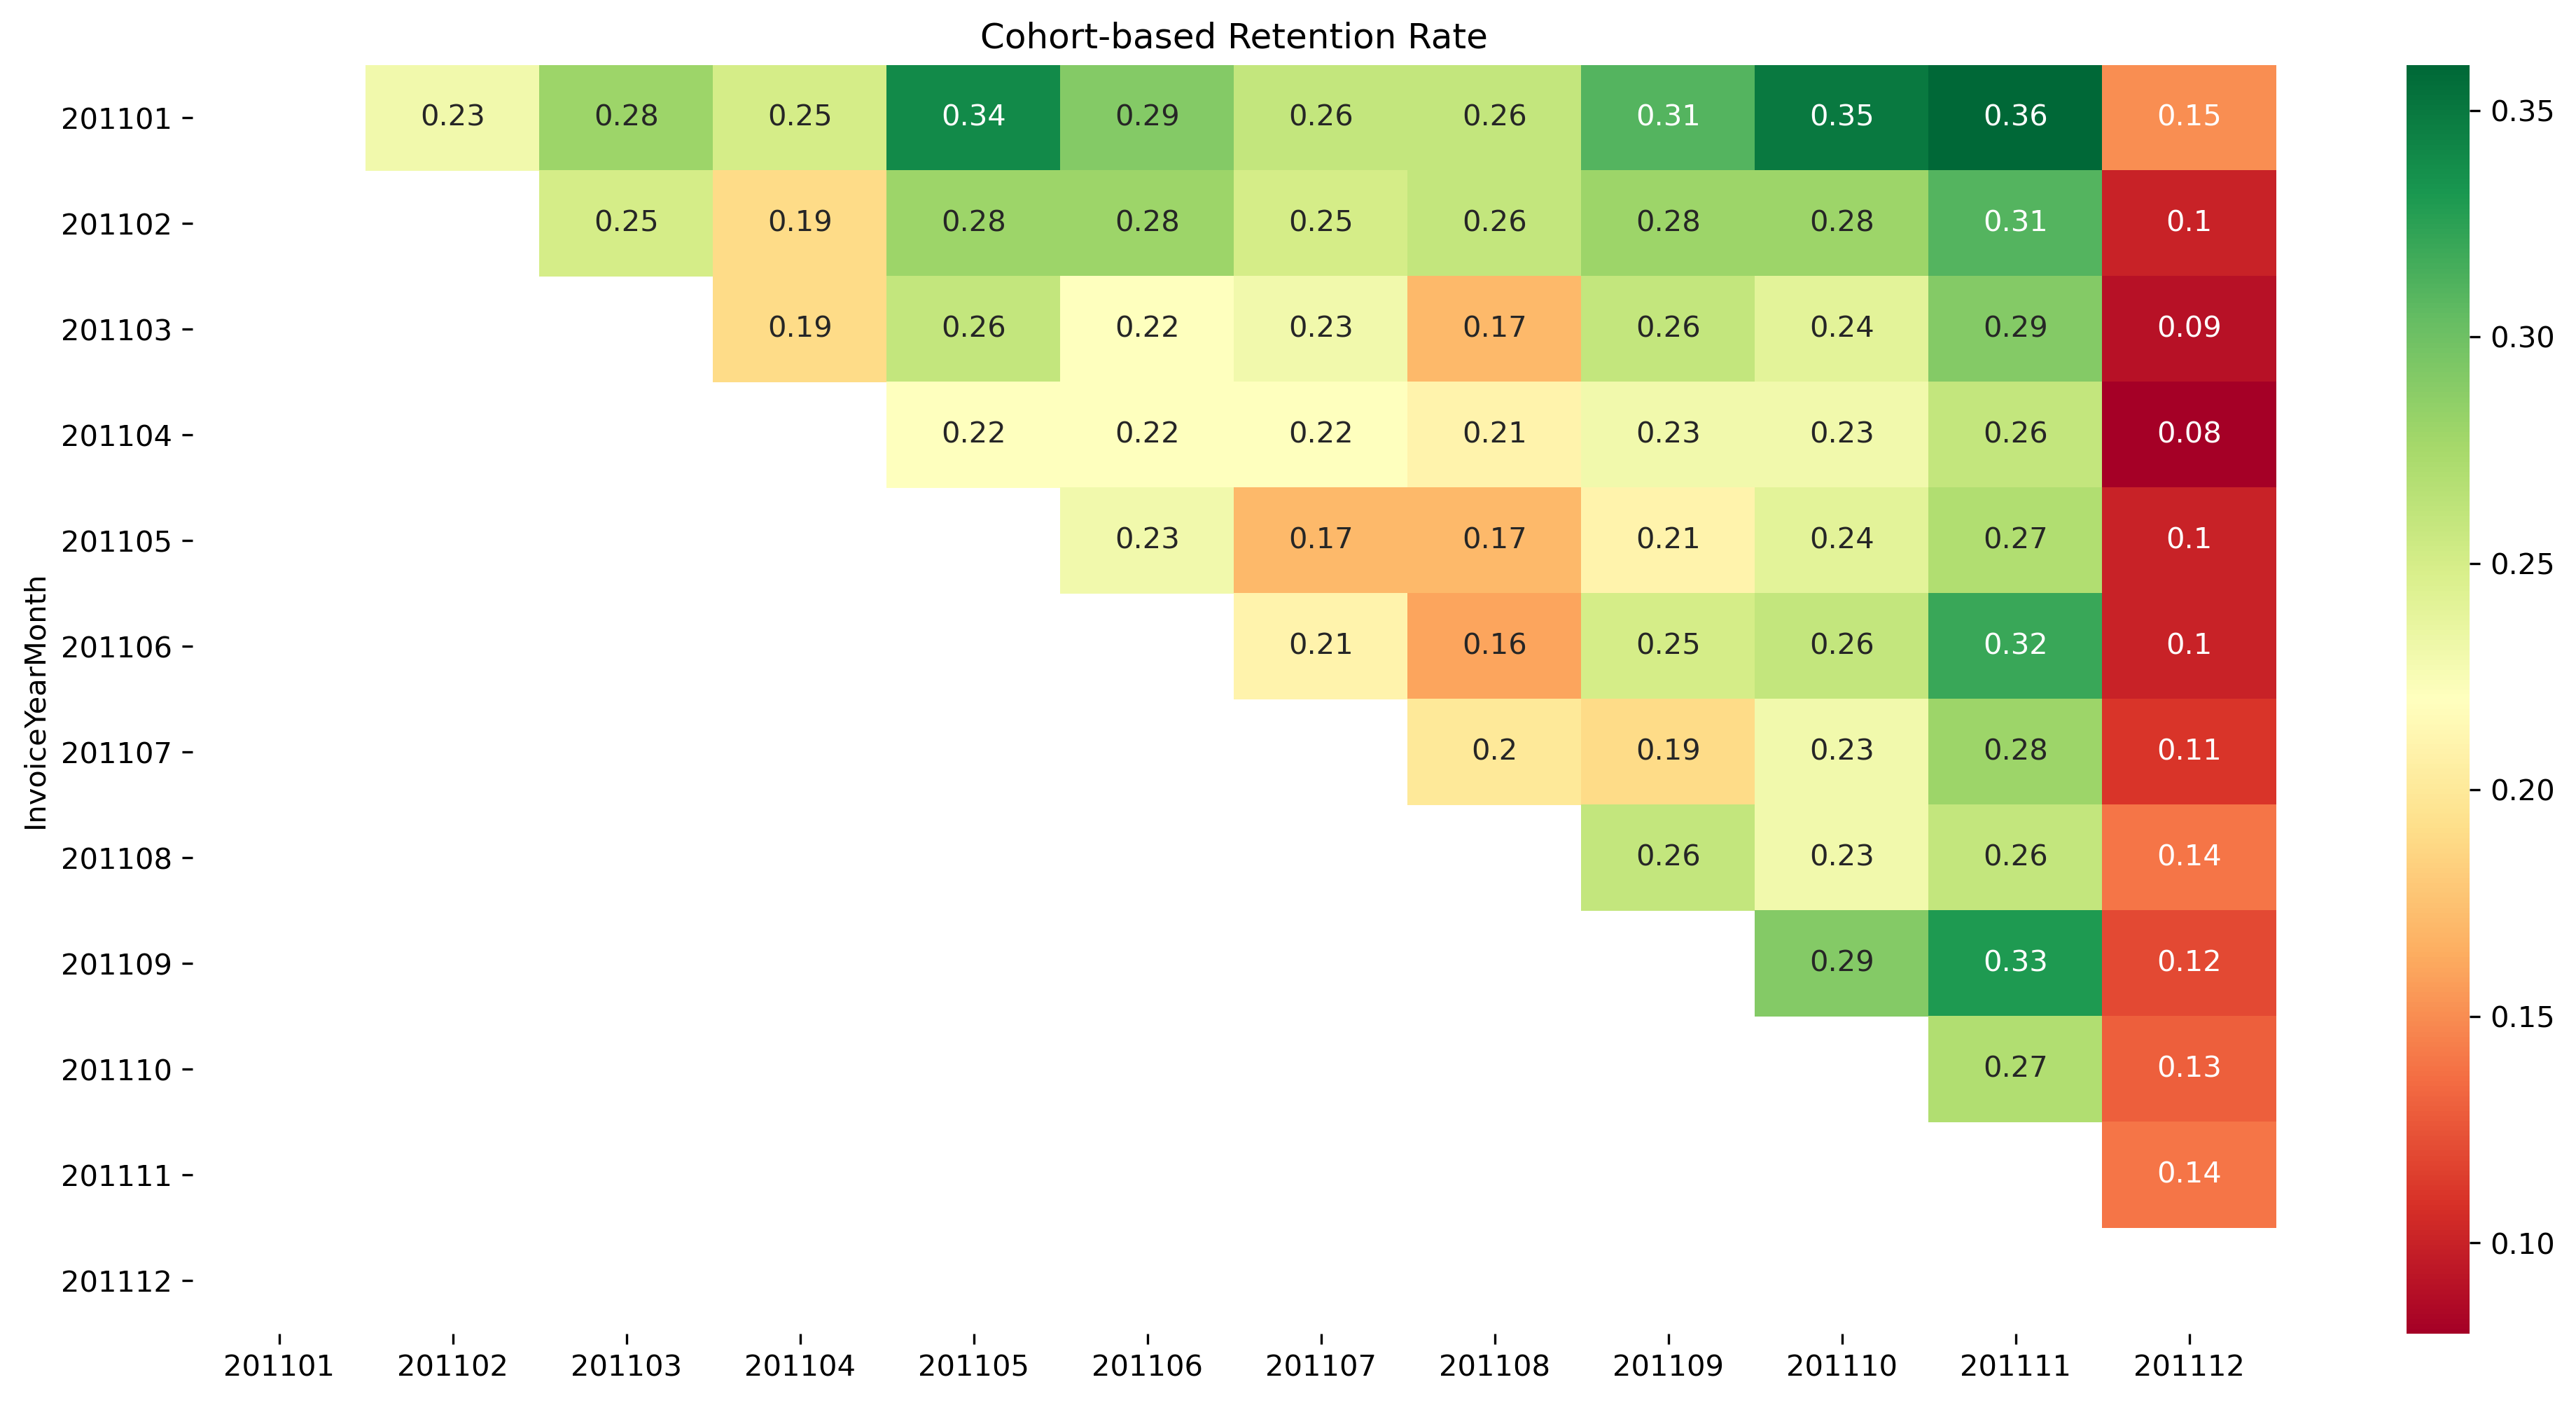

In [70]:
plt.figure(figsize=[16,8], dpi = 300)
sns.heatmap(t, annot=True, cmap="RdYlGn")
plt.title('Cohort-based Retention Rate')

# PART B
## MARKET ATTRIBUTION MODELLING
In a typical _‘from think to buy’_ customer journey, a customer goes through multiple touch points before zeroing in on the final product to buy. This is even more prominent in the case of e-commerce sales. It is relatively easier to track which are the different touch points the customer has encountered before making the final purchase.

As marketing moves more and more towards the consumer driven side of things, identifying the right channels to target customers has become critical for companies. This helps companies optimise their marketing spend and target the right customers in the right places.

More often than not, companies usually invest in the last channel which customers encounter before making the final purchase. However, this may not always be the right approach. There are multiple channels preceding that channel which eventually drive the customer conversion. The underlying concept to study this behavior is known as **multi-channel attribution modeling.**

## 3. CHANNEL ATTRIBUTION
An attribution model is the rule, or set of rules, that determines how credit for sales and conversions is assigned to touchpoints in conversion paths. 

In this section i will use and compare 3 channel attribution models namely: First touch, Last touch and Markov chain.

1. **First Touch Attribution:** The First Interaction model assigns 100% credit to touchpoints that initiate conversion paths.

2. **Last Touch Attribution:** The Last Interaction model 100% credit to the final touchpoints (i.e., clicks) that immediately precede sales or conversions

3. **Markov Chain:** Markov Chain Model is a model that describes a sequence of events where the probability of each event depends only on the previous one. In the specific case of attribution modeling, the graph is the set of all customer paths, and the events are the visits to our website or our app, defined by the channel that brought the customer to it. As for the model's outcome, it is simply the conversion (1/0: there is/not a conversion at the end of the sequence).

#### Assumption
The dataset that does not contain information such as sales/marketing channels. However, for illustration purposes and to prove my knowledge of growth techniques such as **attribution modelling**, i created random sales channels and assume the conversion occurs due to one or some of these channels.

In [71]:
channels = ['TV', 'Radio', 'Facebook', 'Google', 'Instagram']
conversion = [0,1]
tx_min_purchase['Conversion'] = tx_min_purchase.apply(lambda x: np.random.choice(conversion, p=[0.65, 0.35] ),axis=1)

In [72]:

df = pd.merge(tx_uk[['InvoiceNo', 'CustomerID', 'InvoiceDate']], tx_min_purchase[['CustomerID','Conversion']], 
              on='CustomerID', how='inner')
df['AcqChannel'] = df.apply(lambda x: np.random.choice(channels, p=[0.08, 0.10, 0.2, 0.28, 0.34]),axis=1)


In [73]:
df.head()

,InvoiceNo,CustomerID,InvoiceDate,Conversion,AcqChannel
0,536365,17850.0,2010-12-01 08:26:00,1,Instagram
1,536365,17850.0,2010-12-01 08:26:00,1,Google
2,536365,17850.0,2010-12-01 08:26:00,1,Instagram
3,536365,17850.0,2010-12-01 08:26:00,1,Instagram
4,536365,17850.0,2010-12-01 08:26:00,1,Instagram


In [74]:
df = df.sort_values(['CustomerID', 'InvoiceDate'],
                    ascending=[False, True])
df['visit_order'] = df.groupby('CustomerID').cumcount() + 1
df.head()

,InvoiceNo,CustomerID,InvoiceDate,Conversion,AcqChannel,visit_order
286057,554065,18287.0,2011-05-22 10:39:00,0,Instagram,1
286058,554065,18287.0,2011-05-22 10:39:00,0,Instagram,2
286059,554065,18287.0,2011-05-22 10:39:00,0,Instagram,3
286060,554065,18287.0,2011-05-22 10:39:00,0,Google,4
286061,554065,18287.0,2011-05-22 10:39:00,0,Instagram,5


In [75]:
df_paths = df.groupby('CustomerID')['AcqChannel'].aggregate(
    lambda x: x.unique().tolist()).reset_index()
    
df_paths.head()

,CustomerID,AcqChannel
0,12346.0,"[TV, Instagram]"
1,12747.0,"[Google, Instagram, Radio, Facebook, TV]"
2,12748.0,"[TV, Google, Instagram, Facebook, Radio]"
3,12749.0,"[Google, Facebook, Radio, Instagram, TV]"
4,12820.0,"[Instagram, Facebook, Google, Radio, TV]"


In [76]:
df_last_interaction = df.drop_duplicates('CustomerID', keep='last')[['CustomerID', 'Conversion']]

df_paths = pd.merge(df_paths, df_last_interaction, how='left', on='CustomerID')


In [77]:
df_paths['path'] = np.where(df_paths['Conversion'] == 0,
                            ['Start, '] + df_paths['AcqChannel'].apply(', '.join) + [', Null'],
                            ['Start, '] + df_paths['AcqChannel'].apply(', '.join) + [', Conversion'])

df_paths['path'] = df_paths['path'].str.split(', ')

In [78]:
df_paths = df_paths[['CustomerID', 'path']]

In [79]:
df_paths.head()

,CustomerID,path
0,12346.0,"[Start, TV, Instagram, Null]"
1,12747.0,"[Start, Google, Instagram, Radio, Facebook, TV..."
2,12748.0,"[Start, TV, Google, Instagram, Facebook, Radio..."
3,12749.0,"[Start, Google, Facebook, Radio, Instagram, TV..."
4,12820.0,"[Start, Instagram, Facebook, Google, Radio, TV..."


## 3.1 Markov Chains

The algorithm for Markov Chains can be summarized in 2 steps:
- Calculate transition probabilities between all states in our state-space
- Calculate removal effects (for more info on removal effects, see part 1)

I’ll start by defining a list of all user journeys, the number of total conversion and the base level conversion rate.

In [80]:
#_________function to calculate transition states

list_of_paths = df_paths['path']
total_conversions = sum(path.count('Conversion') for path in df_paths['path'].tolist())
base_conversion_rate = total_conversions / len(list_of_paths)



#### Function that identifies all potential state transitions and outputs a dictionary containing these. 
I’ll use this as an input when calculating transition probabilities


In [81]:
def transition_states(list_of_paths):
    list_of_unique_channels = set(x for element in list_of_paths for x in element)
    transition_states = {x + '>' + y: 0 for x in list_of_unique_channels for y in list_of_unique_channels}

    for possible_state in list_of_unique_channels:
        if possible_state not in ['Conversion', 'Null']:
            for user_path in list_of_paths:
                if possible_state in user_path:
                    indices = [i for i, s in enumerate(user_path) if possible_state == s]
                    for col in indices:
                        transition_states[user_path[col] + '>' + user_path[col + 1]] += 1

    return transition_states


trans_states = transition_states(list_of_paths)

#### Function to calculate all transition probabilities

In [82]:
def transition_prob(trans_dict):
    list_of_unique_channels = set(x for element in list_of_paths for x in element)
    trans_prob = defaultdict(dict)
    for state in list_of_unique_channels:
        if state not in ['Conversion', 'Null']:
            counter = 0
            index = [i for i, s in enumerate(trans_dict) if state + '>' in s]
            for col in index:
                if trans_dict[list(trans_dict)[col]] > 0:
                    counter += trans_dict[list(trans_dict)[col]]
            for col in index:
                if trans_dict[list(trans_dict)[col]] > 0:
                    state_prob = float((trans_dict[list(trans_dict)[col]])) / float(counter)
                    trans_prob[list(trans_dict)[col]] = state_prob

    return trans_prob


trans_prob = transition_prob(trans_states)

#### Converting Transition Probabilities to DataFrame

To do this we’ll make use of linear algebra and matrix manipulations, therefore let’s turn our above transition probabilities dictionary into a data frame (matrix).

In [83]:
#_______ transition matrix__________

def transition_matrix(list_of_paths, transition_probabilities):
    trans_matrix = pd.DataFrame()
    list_of_unique_channels = set(x for element in list_of_paths for x in element)

    for channel in list_of_unique_channels:
        trans_matrix[channel] = 0.00
        trans_matrix.loc[channel] = 0.00
        trans_matrix.loc[channel][channel] = 1.0 if channel in ['Conversion', 'Null'] else 0.0

    for key, value in transition_probabilities.items():
        origin, destination = key.split('>')
        trans_matrix.at[origin, destination] = value

    return trans_matrix


In [84]:
trans_matrix = transition_matrix(list_of_paths, trans_prob)
trans_matrix = trans_matrix.round(2)
#trans_matrix.to_excel('transition_matrix.xlsx')

In [85]:
trans_matrix

,Start,Null,Conversion,Radio,Facebook,Google,Instagram,TV
Start,0.0,0.00,0.00,0.10,0.20,0.29,0.34,0.08
Null,0.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00
Conversion,0.0,0.00,1.00,0.00,0.00,0.00,0.00,0.00
Radio,0.0,0.22,0.12,0.00,0.16,0.14,0.13,0.22
Facebook,0.0,0.10,0.07,0.21,0.00,0.20,0.21,0.21
Google,0.0,0.07,0.03,0.21,0.25,0.00,0.24,0.19
Instagram,0.0,0.06,0.04,0.21,0.24,0.26,0.00,0.20
TV,0.0,0.26,0.15,0.19,0.15,0.13,0.11,0.00


### 3.1.1 Marketing Channels Interaction Probabilities

The transition probabilities heatmap below visualizes how our marketing channels interacts with each other. For instance, the probability of conversion (that is, purchasing a product) after engaging with TV is 7%, the probability of a customer engaging with Facebook after watching TV is 15% and so on.

Using historical context and the heat map above we not only gain insights into how each marketing channel is driving users towards our conversion event, but we also gain critical information around how our marketing channels are interacting with each other. Given today’s typical multi-touch conversion journeys this information can prove to be extremely valuable and allows us to optimize our multi-channel customer journeys for conversion.

Text(514.1666666666667, 0.5, 'Channel from')

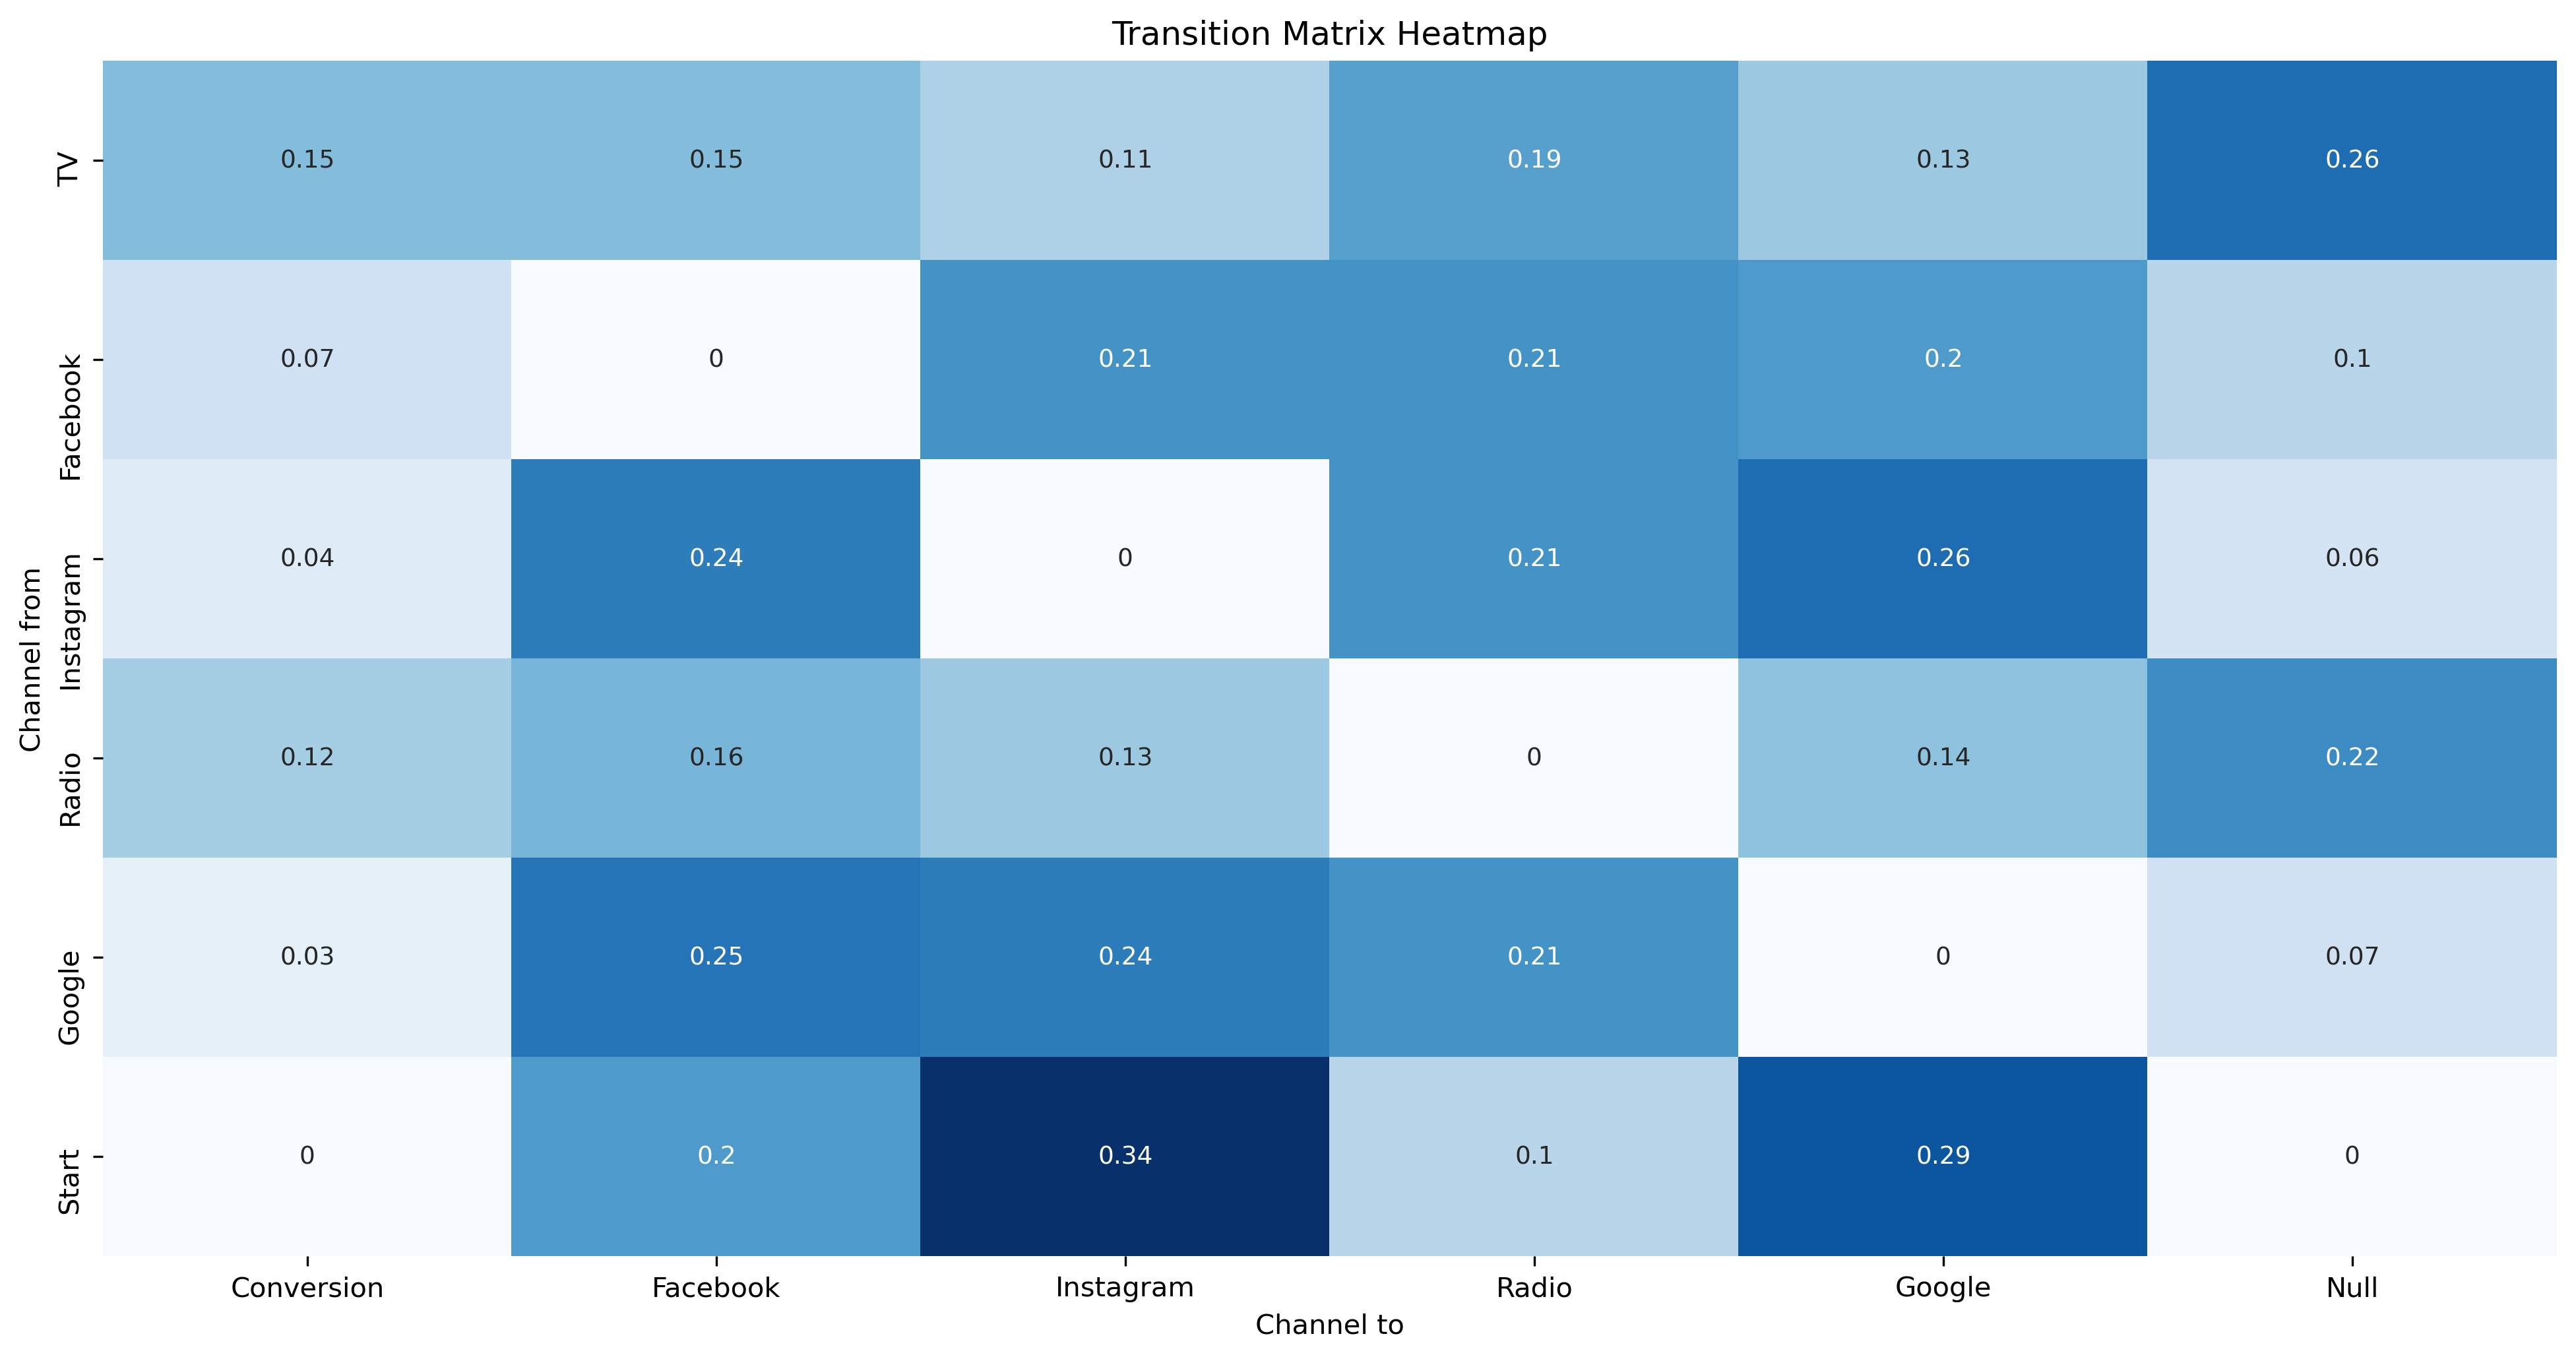

In [86]:
tr = trans_matrix.copy()
tr = tr.reindex(['TV','Facebook', 'Instagram', 'Radio','Google', 'Start'], axis=0)
#tr.drop('Start', axis=1, inplace=True)
tr = tr.reindex(['Conversion','Facebook', 'Instagram', 'Radio','Google','Null'], axis=1)
plt.figure(figsize=[16,8], dpi = 300)
sns.heatmap(tr, annot = True, cmap="Blues", cbar = False, annot_kws={"size": 9})
plt.title('Transition Matrix Heatmap')
plt.xlabel('Channel to')
plt.ylabel('Channel from')

### 3.1.2 Removal Effects Function
If we were to figure out what is the contribution of a channel in our customer’s journey from start to end conversion, we will use the principle of removal effect. **Removal effect principle** says that if we want to find the contribution of each channel in the customer journey, we can do so by removing each channel and see how many conversions are happening without that channel being in place.

In [87]:
def removal_effects(df, conversion_rate):
    removal_effects_dict = {}
    channels = [channel for channel in df.columns if channel not in ['Start',
                                                                     'Null',
                                                                     'Conversion']]
    for channel in channels:
        removal_df = df.drop(channel, axis=1).drop(channel, axis=0)
        for column in removal_df.columns:
            row_sum = np.sum(list(removal_df.loc[column]))
            null_pct = float(1) - row_sum
            if null_pct != 0:
                removal_df.loc[column]['Null'] = null_pct
            removal_df.loc['Null']['Null'] = 1.0

        removal_to_conv = removal_df[
            ['Null', 'Conversion']].drop(['Null', 'Conversion'], axis=0)
        removal_to_non_conv = removal_df.drop(
            ['Null', 'Conversion'], axis=1).drop(['Null', 'Conversion'], axis=0)

        removal_inv_diff = np.linalg.inv(
            np.identity(
                len(removal_to_non_conv.columns)) - np.asarray(removal_to_non_conv))
        removal_dot_prod = np.dot(removal_inv_diff, np.asarray(removal_to_conv))
        removal_cvr = pd.DataFrame(removal_dot_prod,
                                   index=removal_to_conv.index)[[1]].loc['Start'].values[0]
        removal_effect = 1 - removal_cvr / conversion_rate
        removal_effects_dict[channel] = removal_effect

    return removal_effects_dict


In [88]:
removal_effects_dict = removal_effects(trans_matrix, base_conversion_rate)

remov = pd.DataFrame.from_dict(removal_effects_dict, orient = 'index')
remov.reset_index(inplace=True)
remov.columns = ['channel','removal_effects']

#### Total number of conversion attributed to each channel by the Markov Chain algorithm:

In [89]:
def markov_chain_allocations(removal_effects, total_conversions):
    re_sum = np.sum(list(removal_effects.values()))

    return {k: (v / re_sum) * total_conversions for k, v in removal_effects.items()}


attributions = markov_chain_allocations(removal_effects_dict, total_conversions)

In [90]:
attrib = pd.DataFrame.from_dict(attributions, orient='index')
attrib.reset_index(inplace = True)
attrib.columns = ['channel','attributed_conversions']
attrib['attributed_conversions'] = attrib['attributed_conversions'].astype(int)

In [91]:
full_conversion = remov.merge(attrib, on = 'channel')
full_conversion['removal_effects'] = full_conversion['removal_effects'].round(1)
full_conversion = full_conversion.sort_values(by='attributed_conversions', ascending=False)
full_conversion

,channel,removal_effects,attributed_conversions
3,Instagram,0.6,302
1,Facebook,0.6,289
2,Google,0.6,284
4,TV,0.6,279
0,Radio,0.6,275


Text(0.5, 1.0, 'Total Number of Conversions to each Channel by Markov Chain')

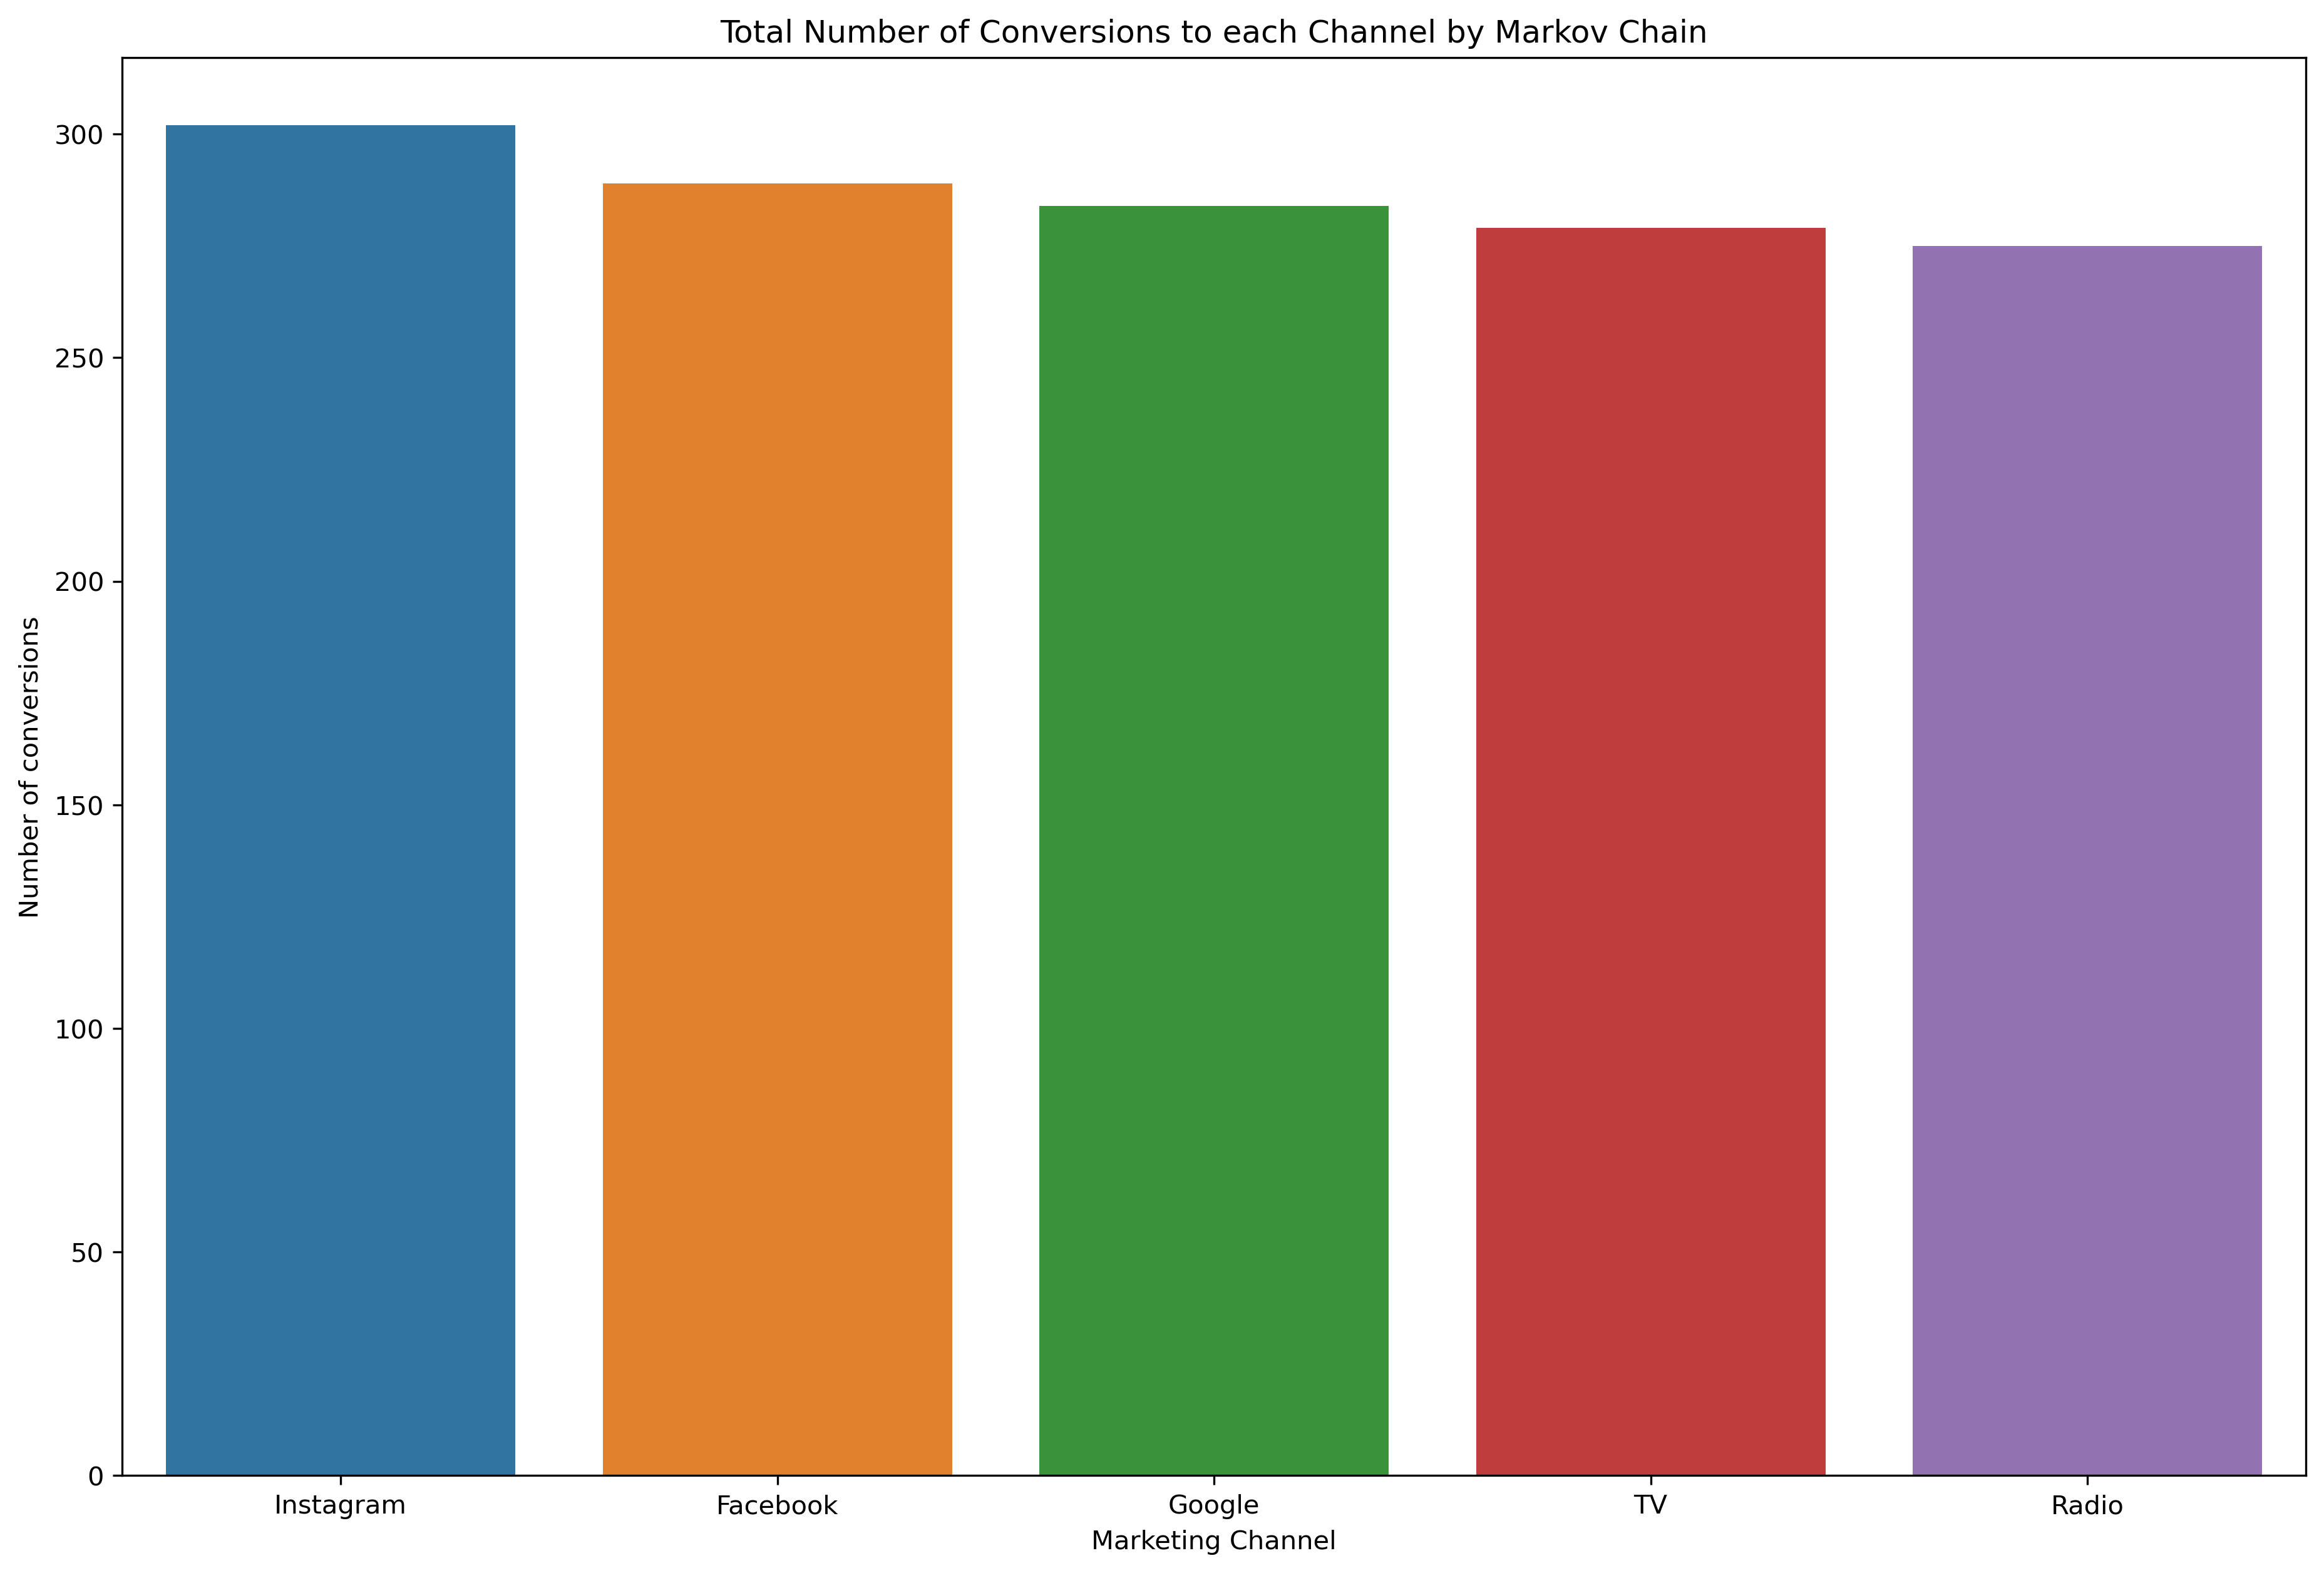

In [92]:
plt.figure(figsize=(15,10), dpi=300)
#sns.set_style("whitegrid")
sns.barplot("channel", y="attributed_conversions", data=full_conversion)
plt.xlabel('Marketing Channel')
plt.ylabel('Number of conversions')
plt.title('Total Number of Conversions to each Channel by Markov Chain')
#plt.savefig('Attribution.eps', format = 'eps', dpi = 1000)

## 3.2 First Touch Attribution
The revenue generated by the purchase is attributed to the first marketing channel the user engaged with, on the journey towards the purchase.


In [93]:
########################################################
#___________ FIRST INTERACTION
########################################################

df_first = df.drop_duplicates('CustomerID', keep='first')[['CustomerID', 'AcqChannel','Conversion']]
df_first = pd.DataFrame(df_first.groupby('AcqChannel')['Conversion'].sum())
df_first.reset_index(inplace= True)
df_first = df_first.rename(columns = {'AcqChannel': 'channel', 'Conversion':'first'})

df_first

,channel,first
0,Facebook,266
1,Google,430
2,Instagram,473
3,Radio,144
4,TV,117


## 3.3 Last Touch Attribution

As the name suggests, Last Touch is the attribution approach where any revenue generated is attributed to the marketing channel that a user last engaged with.
While this approach has its advantage in its simplicity, we run the risk of oversimplifying our attribution, as the last touch isn’t necessarily the marketing activity that generates the purchase.

In [94]:
########################################################
#___________ LAST INTERACTION
########################################################

df_last = df.drop_duplicates('CustomerID', keep='last')[['CustomerID', 'AcqChannel','Conversion']]
df_last = pd.DataFrame(df_last.groupby('AcqChannel')['Conversion'].sum())
df_last.reset_index(inplace = True)
df_last = df_last.rename(columns = {'AcqChannel': 'channel', 'Conversion':'last'})
df_last

,channel,last
0,Facebook,274
1,Google,381
2,Instagram,511
3,Radio,151
4,TV,113


## 3.4 Comparing First, Last and Markov Touch Attribution

In [95]:
full_conversion = full_conversion.rename(columns = {'attributed_conversions': 'markov'})
full_conversion = full_conversion.drop(['removal_effects'], axis=1)

full_conversion = pd.merge(full_conversion, df_first, on ='channel', how = 'inner')
full_conversion = pd.merge(full_conversion, df_last, on ='channel', how = 'inner')

full_conversion.reset_index(inplace = True, drop = True)
full_conversion

,channel,markov,first,last
0,Instagram,302,473,511
1,Facebook,289,266,274
2,Google,284,430,381
3,TV,279,117,113
4,Radio,275,144,151


In [96]:
full_conv2 = pd.melt(full_conversion, id_vars=['channel'])
full_conv2.columns = ['channel', 'model', 'num_of_conversions']
full_conv2

,channel,model,num_of_conversions
0,Instagram,markov,302
1,Facebook,markov,289
2,Google,markov,284
3,TV,markov,279
4,Radio,markov,275
5,Instagram,first,473
6,Facebook,first,266
7,Google,first,430
8,TV,first,117
9,Radio,first,144


Text(0, 0.5, 'Number of Conversions')

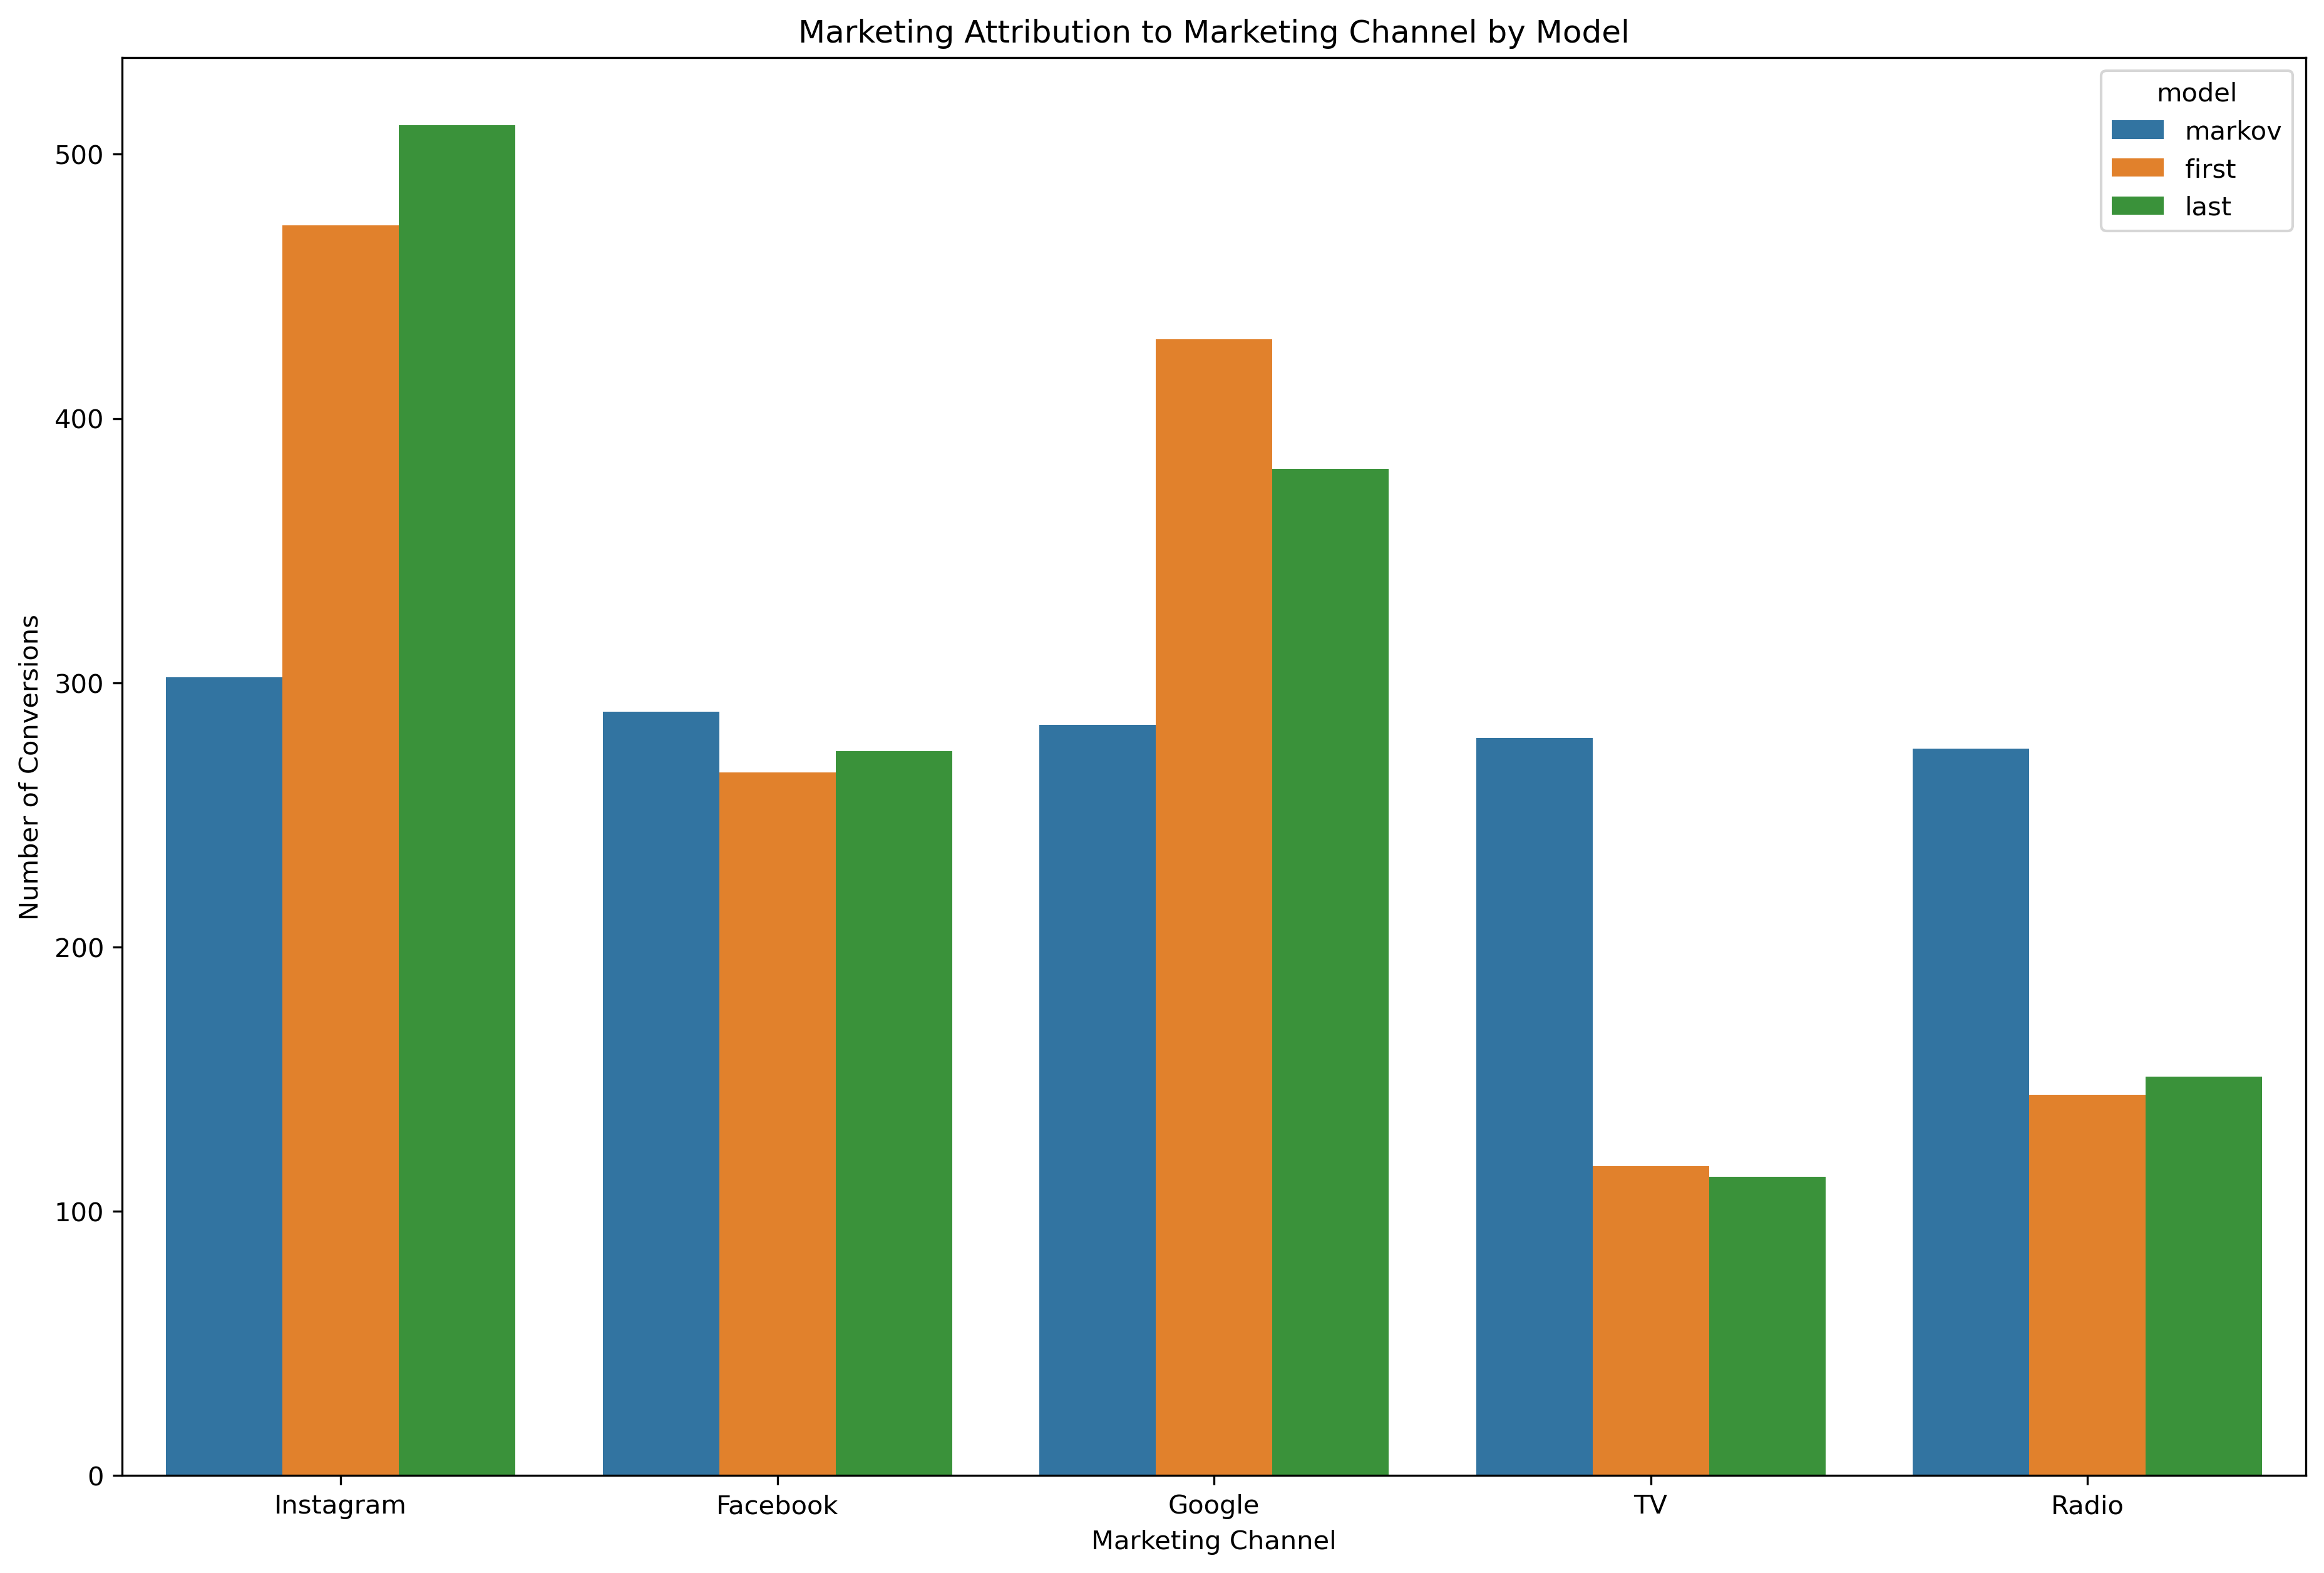

In [97]:
plt.figure(figsize=(15,10), dpi=300)
sns.barplot(x="channel", y="num_of_conversions", hue="model", data=full_conv2)
#sns.catplot(x="channel", y="value", hue="variable", kind="bar", data=full_conv2)
plt.title('Marketing Attribution to Marketing Channel by Model')
plt.xlabel('Marketing Channel')
plt.ylabel('Number of Conversions')

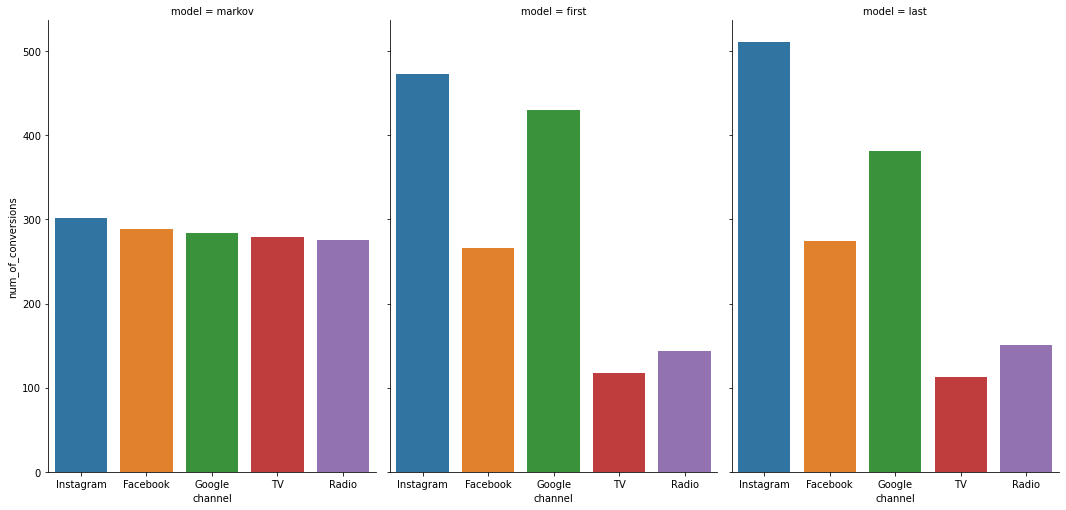

In [98]:
sns.catplot(x="channel", y="num_of_conversions", col="model", data=full_conv2, kind="bar", height=7, aspect=.7)

# PART C
# 4. CUSTOMER SEGMENTATION

#### But first off, why we do segmentation?

Because we can’t treat every customer the same way with the same content, same channel, same importance. They will find another option which understands them better.

Customers who use our platform have different needs and they have their own different profile. We should adapt our actions depending on that. We can do different segmentations according to what we are trying to achieve. If we want to increase retention rate, we can do a segmentation based on churn probability and take actions. But there are very common and useful segmentation methods as well. 

In this section, i will implement one of them to the data: RFM which means Recency, Frequency and Montary value segmentation.

We can have customer segments such as these:

1. **Low Value:** Customers who are less active than others, not very frequent buyer/visitor and generates very low - zero - maybe negative revenue.

2. **Mid Value:** In the middle of everything. Often using our platform (but not as much as our High Values), fairly frequent and generates moderate revenue.

3. **High Value:** The group we don’t want to lose. High Revenue, Frequency and low Inactivity.

We need to calculate Recency, Frequency and Monetary Value (we will call it Revenue from now on) and apply unsupervised machine learning to identify different groups (clusters) for each.

In summary, we would prefer customers with:

- Low recency (that is purchase our product recently) to high recency (purhcase our products many weeks ago).
- High Frequency (purchases frequently)
- Highy Monetary value (Revenue)


In [99]:
from __future__ import division
from datetime import datetime, timedelta

In [100]:
tx_uk.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
361873,581416,22809,SET OF 6 T-LIGHTS SANTA,1,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,201112,2.95,2011-12-08 14:58:00,201112,First-time
361874,581416,22807,SET OF 6 T-LIGHTS TOADSTOOLS,2,2011-12-08 14:58:00,1.25,14569.0,United Kingdom,201112,2.50,2011-12-08 14:58:00,201112,First-time
361875,581416,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-12-08 14:58:00,2.10,14569.0,United Kingdom,201112,2.10,2011-12-08 14:58:00,201112,First-time
361876,581416,22809,SET OF 6 T-LIGHTS SANTA,2,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,201112,5.90,2011-12-08 14:58:00,201112,First-time
361877,581416,23487,SWEET HEART CAKE CARRIER,1,2011-12-08 14:58:00,9.95,14569.0,United Kingdom,201112,9.95,2011-12-08 14:58:00,201112,First-time


In [101]:
tx_user = pd.DataFrame(tx_uk['CustomerID'].unique())
tx_user.columns = ['CustomerID']

## 4.1 Recency

In [102]:
tx_max_purchase = tx_uk.groupby('CustomerID').InvoiceDate.max().reset_index()

In [103]:
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']

In [104]:
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days

In [105]:
tx_user = pd.merge(tx_user, tx_max_purchase[['CustomerID','Recency']], on='CustomerID')

In [106]:
tx_user.head()

,CustomerID,Recency
0,17850.0,301
1,13047.0,31
2,13748.0,95
3,15100.0,329
4,15291.0,25


In [107]:
tx_user.Recency.describe()

count    3950.000000
mean       90.778481
std       100.230349
min         0.000000
25%        16.000000
50%        49.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

Text(0.5, 0, 'Recency')

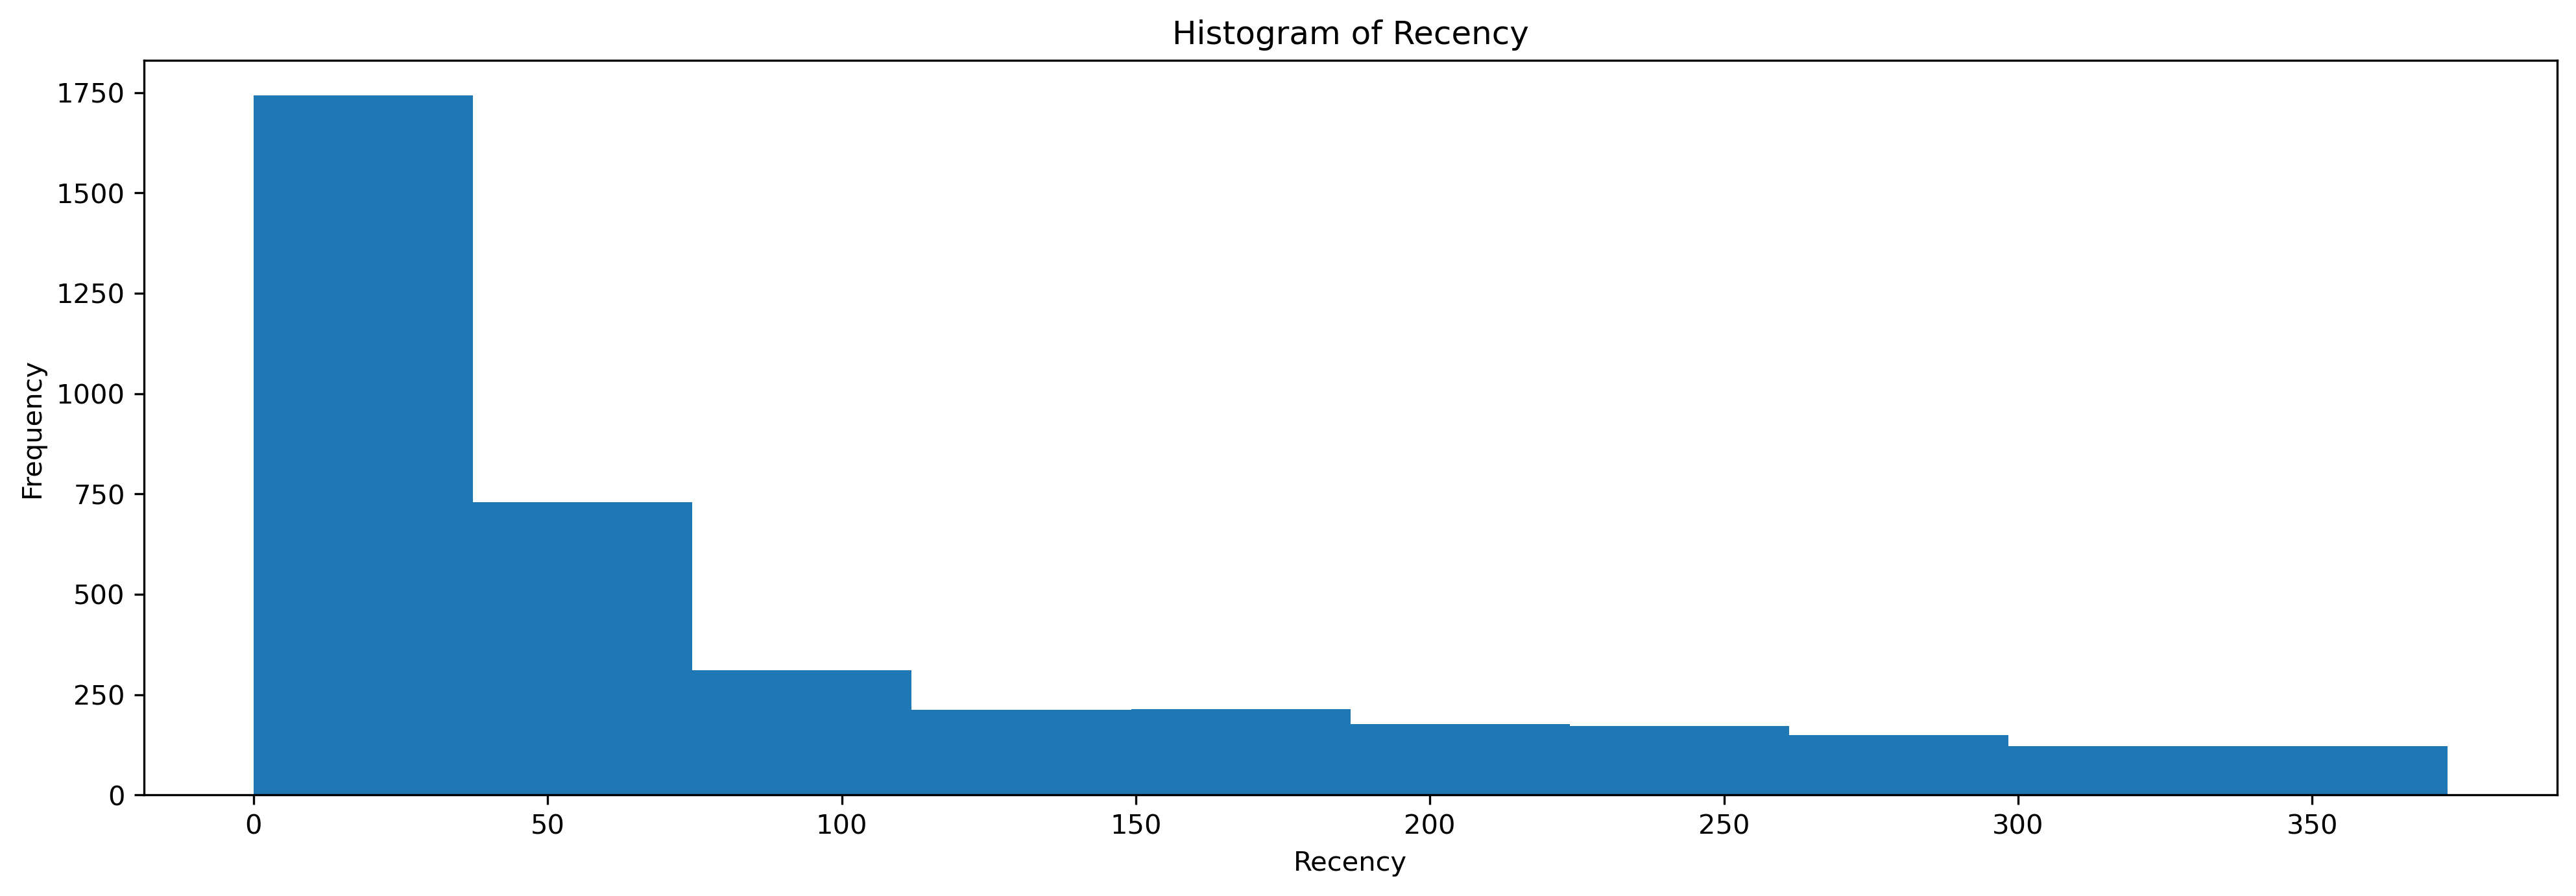

In [108]:
#tx_user.plot(y='Recency', kind='hist', figsize=(16,5), legend=False)
plt.figure(figsize=(16,5), dpi=300)
tx_user['Recency'].plot.hist()
plt.title('Histogram of Recency')
plt.xlabel('Recency')

In [109]:

sse={}
tx_recency = tx_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    


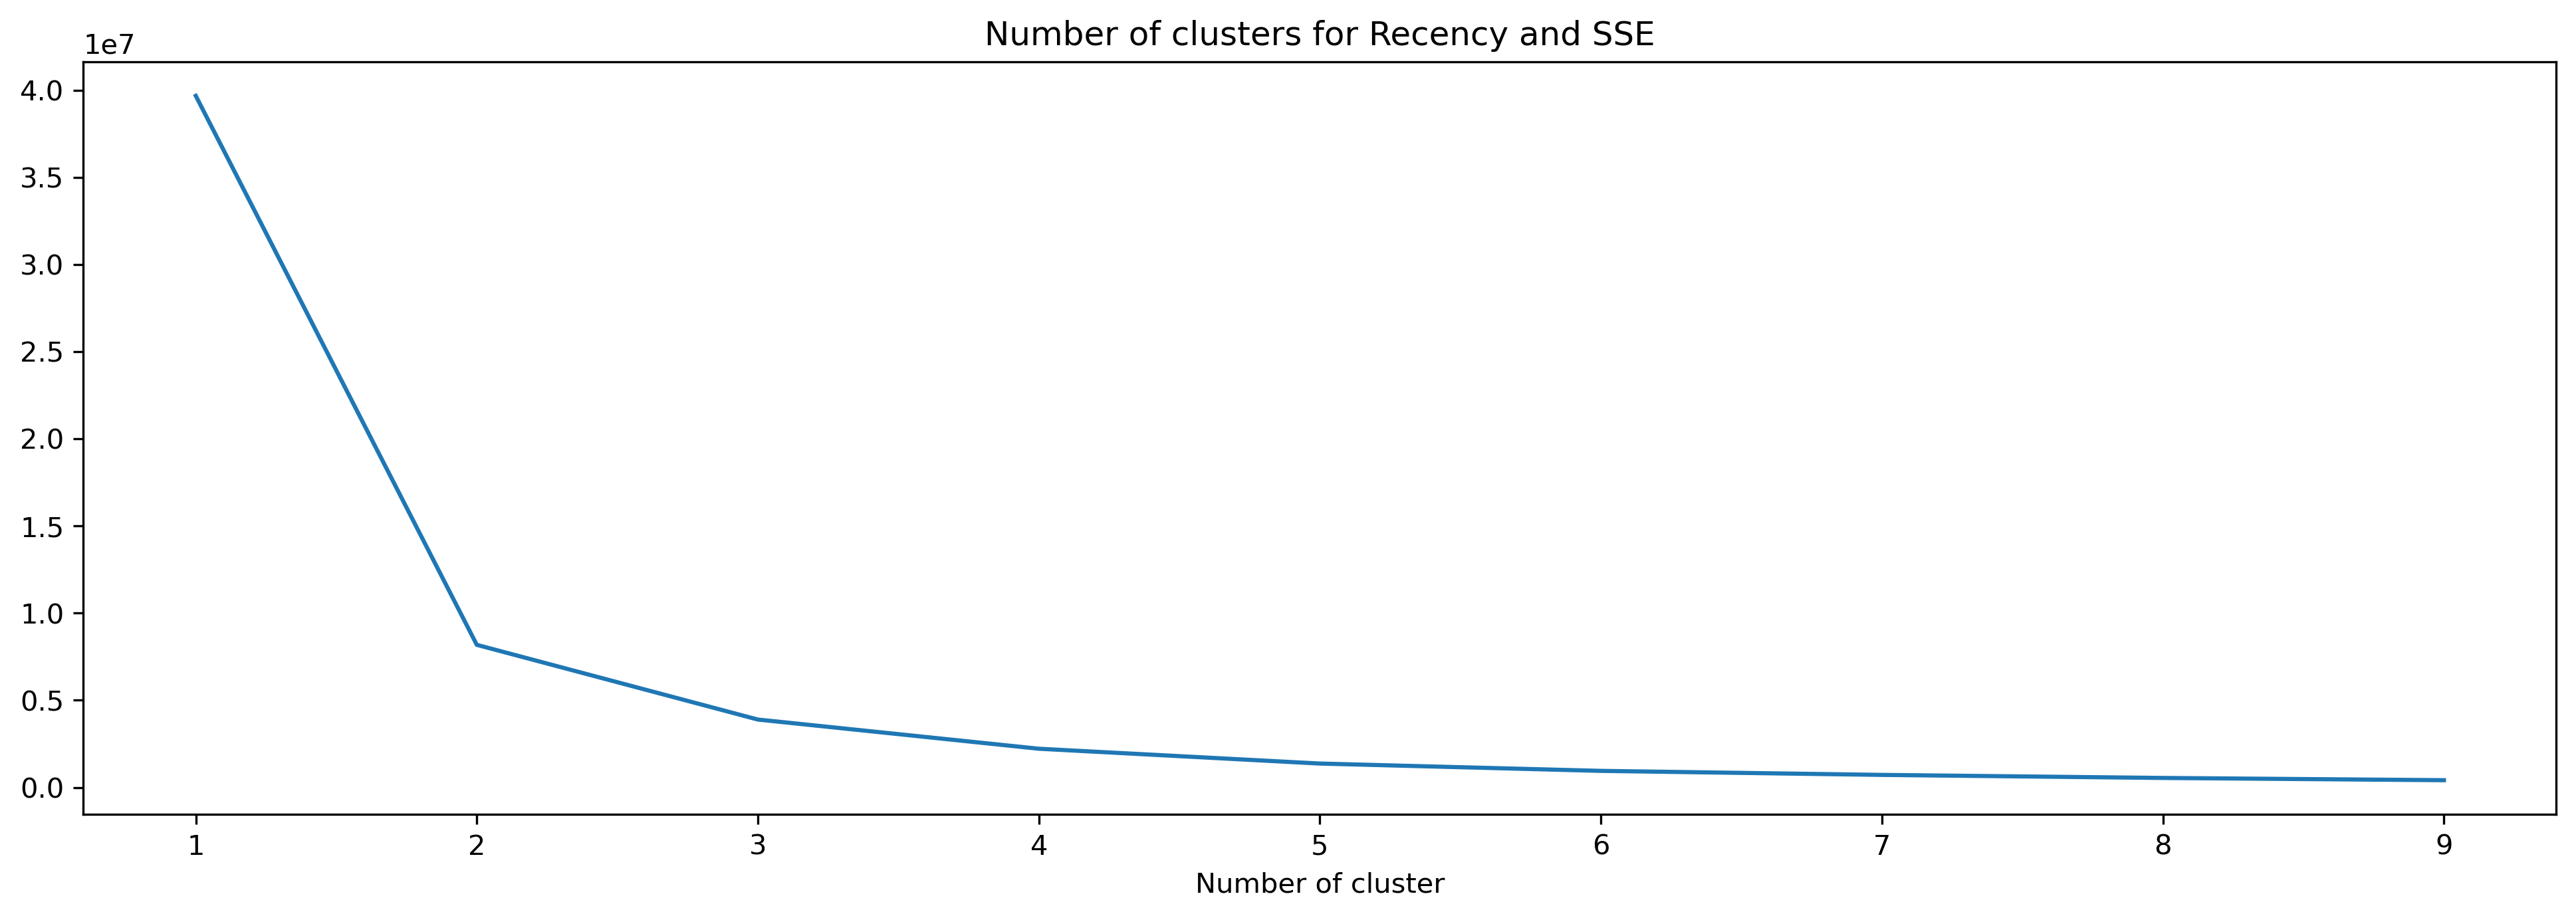

In [110]:
plt.figure(figsize=(16,5), dpi=300)
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.title('Number of clusters for Recency and SSE')
plt.show()

In [111]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])


In [112]:
tx_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,564.0,293.684397,45.612310,224.0,255.0,286.5,326.75,373.0
1,2651.0,30.307808,24.994104,0.0,9.0,24.0,49.00,91.0
2,735.0,153.185034,38.155512,92.0,119.0,153.0,185.00,222.0


#### Function to rearrange clusters

In [113]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [114]:
tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)

## 4.2 Frequency

In [115]:
tx_frequency = tx_uk.groupby('CustomerID').InvoiceDate.nunique().reset_index()

In [116]:
tx_frequency.columns = ['CustomerID','Frequency']

In [117]:
tx_frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12747.0,11
2,12748.0,225
3,12749.0,8
4,12820.0,4


In [118]:
tx_user = pd.merge(tx_user, tx_frequency, on='CustomerID')

In [119]:
tx_user.head()

,CustomerID,Recency,RecencyCluster,Frequency
0,17850.0,301,0,34
1,15100.0,329,0,6
2,18074.0,373,0,1
3,16250.0,260,0,2
4,13747.0,373,0,1


In [120]:
tx_user.Frequency.describe()

count    3950.000000
mean        4.989367
std         8.614673
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       225.000000
Name: Frequency, dtype: float64

Text(0.5, 0, 'Frequency: Number of transactions')

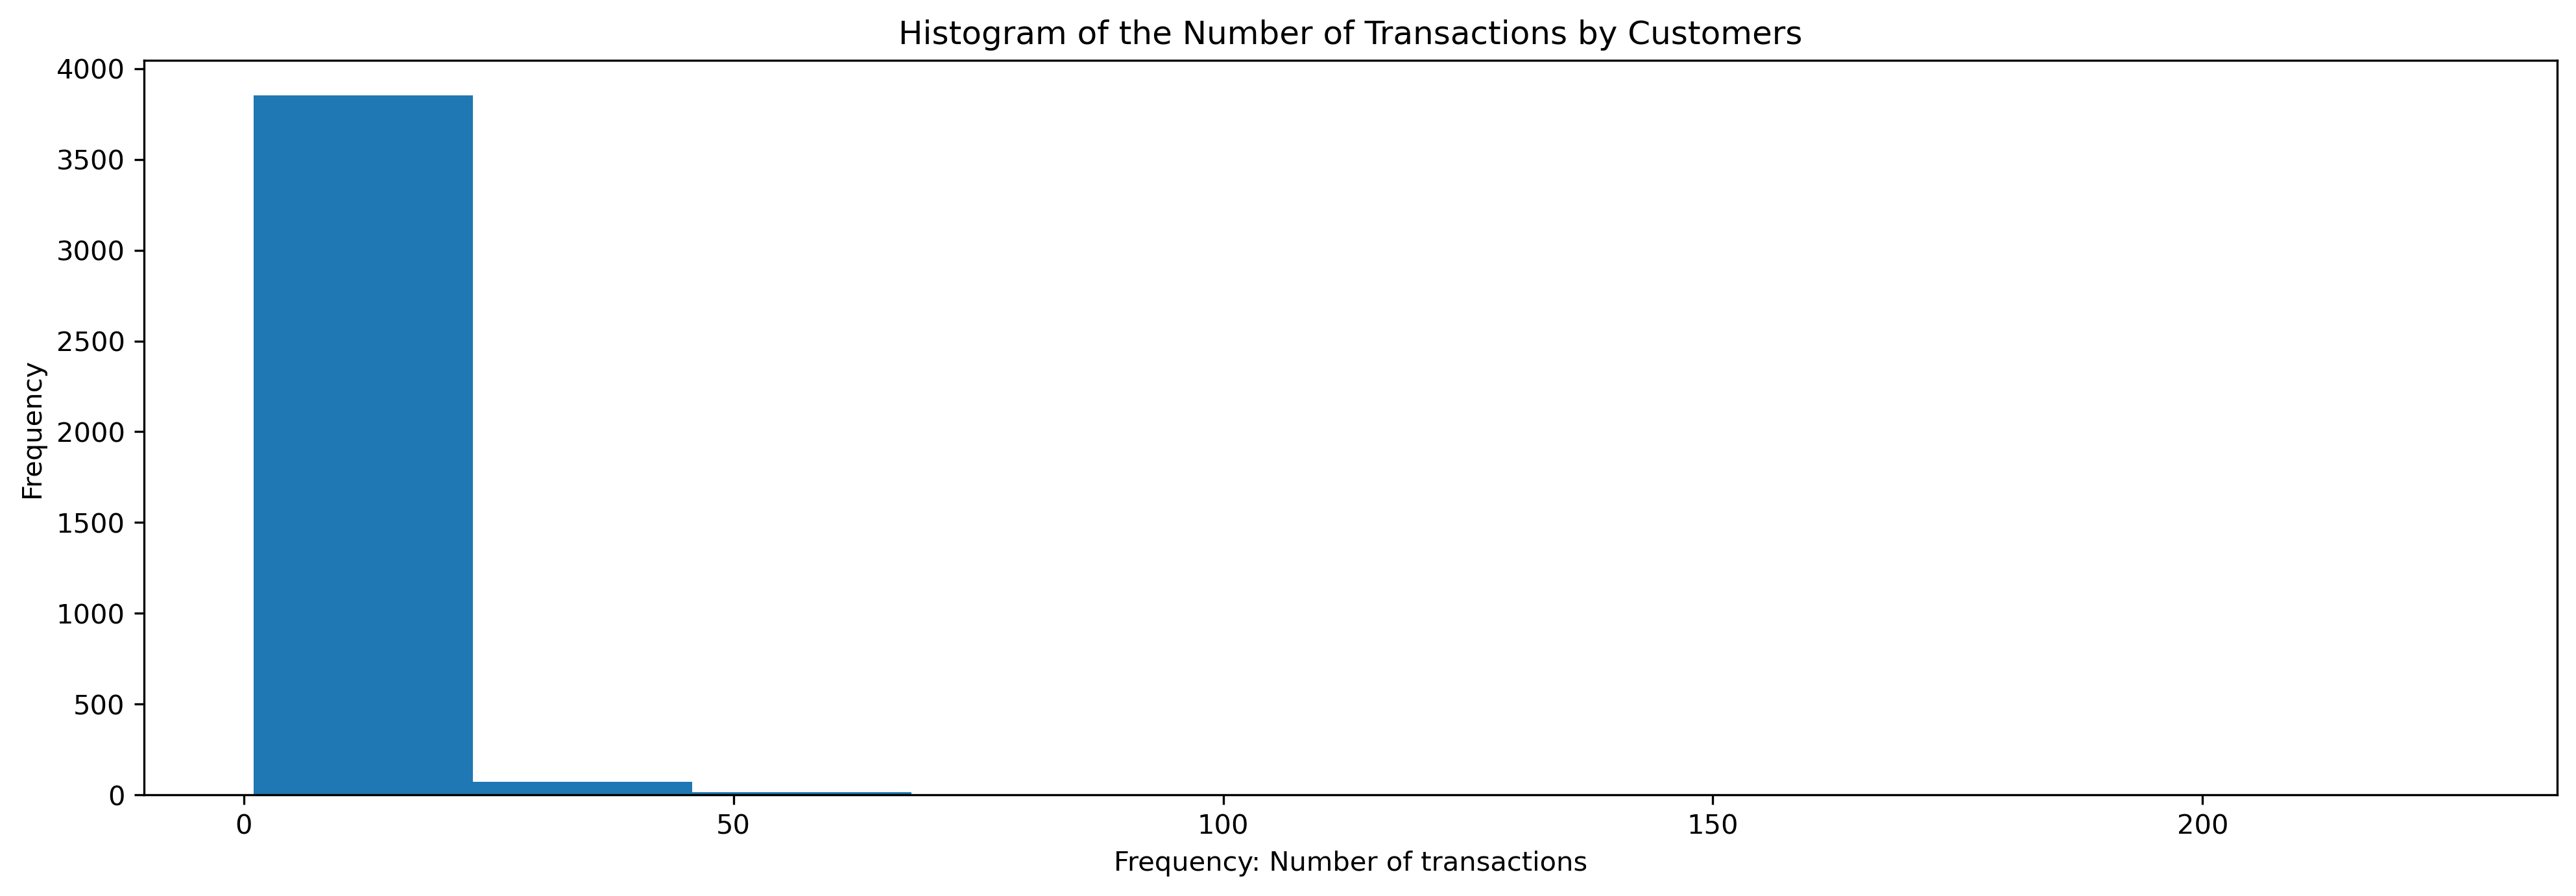

In [121]:
#tx_user.plot(y='Frequency', kind='hist', figsize=(16,5), legend=False)
plt.figure(figsize=(16,5), dpi=300)
tx_user['Frequency'].plot.hist()
plt.title('Histogram of the Number of Transactions by Customers')
plt.xlabel('Frequency: Number of transactions')

In [122]:
sse={}
tx_frequency = tx_user[['Frequency']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_frequency)
    tx_frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 

Text(0.5, 0, 'Number of clusters for Frequency')

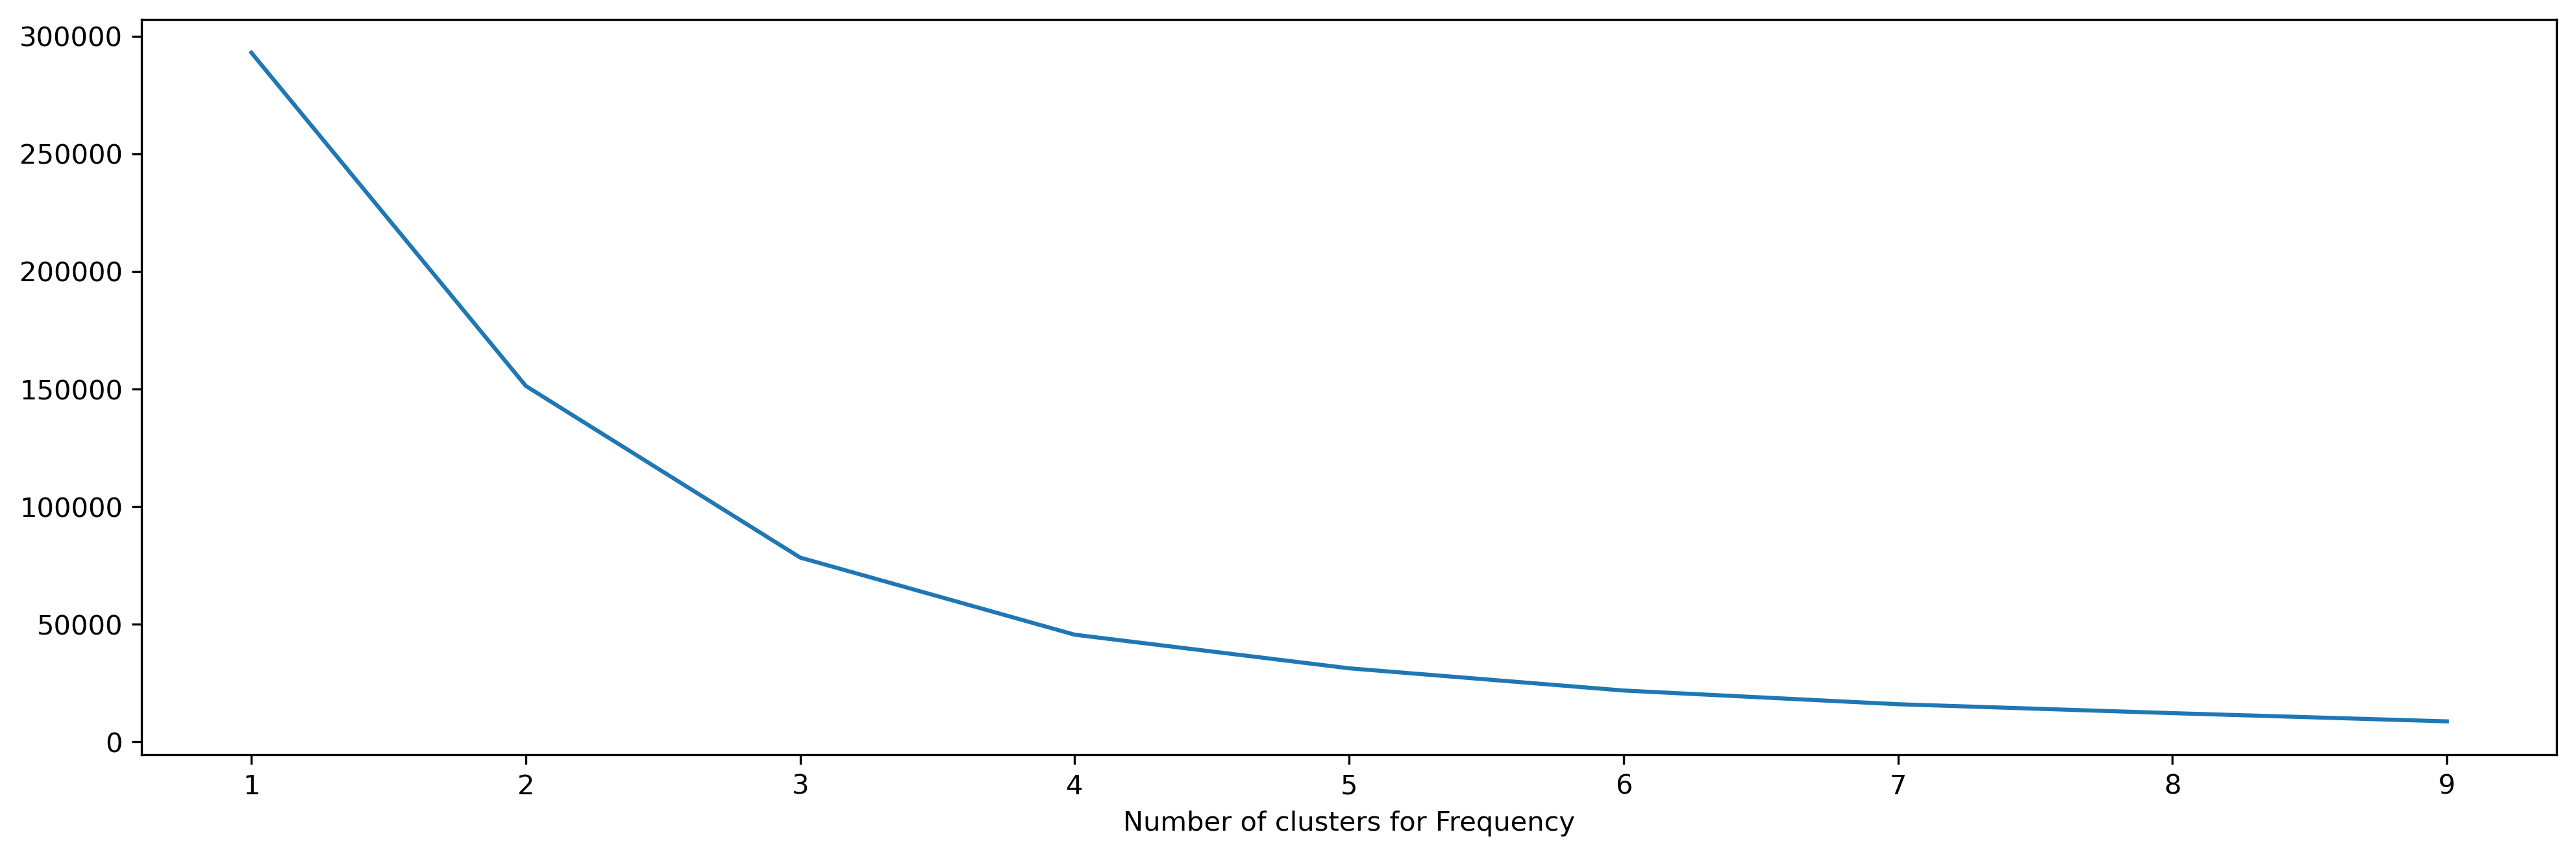

In [123]:
plt.figure(figsize=(16,5), dpi=300)
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters for Frequency")

In [124]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])



In [125]:
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,340.0,20.573529,9.944560,12.0,14.0,17.0,24.00,63.0
1,3600.0,3.212222,2.530605,1.0,1.0,2.0,4.00,11.0
2,10.0,114.900000,49.153840,73.0,79.0,100.0,126.25,225.0


In [126]:
tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)

## 4.3 Monetary Value (Revenue)

In [127]:
tx_rev = tx_uk.groupby('CustomerID').Revenue.sum().reset_index()

In [128]:
tx_rev.head()

,CustomerID,Revenue
0,12346.0,0.00
1,12747.0,4196.01
2,12748.0,29072.10
3,12749.0,3868.20
4,12820.0,942.34


In [129]:
tx_user = pd.merge(tx_user, tx_rev, on='CustomerID')

In [130]:
tx_user.Revenue.describe()

count      3950.000000
mean       1713.385669
std        6548.608224
min       -4287.630000
25%         282.255000
50%         627.060000
75%        1521.782500
max      256438.490000
Name: Revenue, dtype: float64

Text(0.5, 0, 'Revenue')

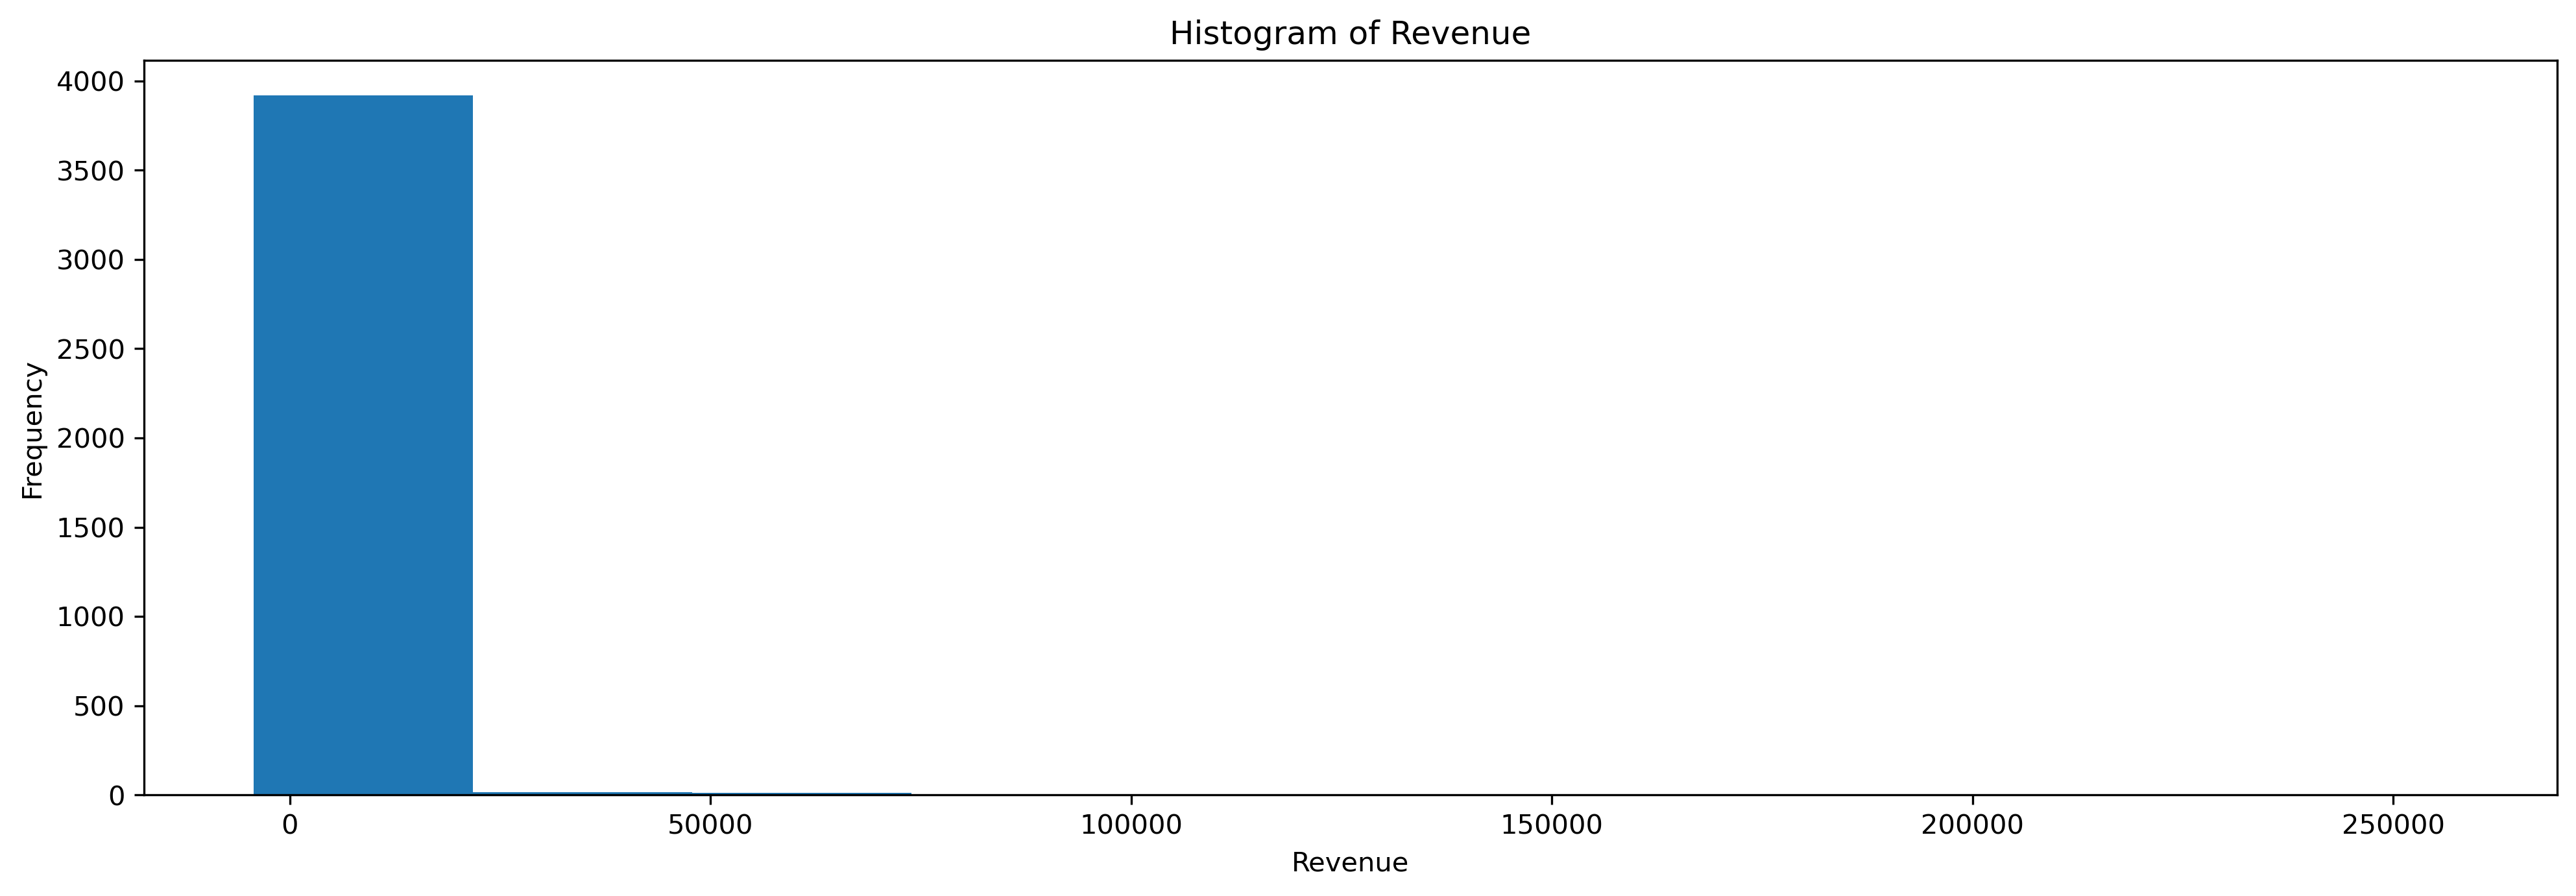

In [131]:
plt.figure(figsize=(16,5), dpi=300)
tx_user['Revenue'].plot.hist()
plt.title('Histogram of Revenue')
plt.xlabel('Revenue')

In [132]:
sse={}
tx_rev = tx_user[['Revenue']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_rev)
    tx_rev["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 

Text(0.5, 0, 'Number of clusters for Revenue')

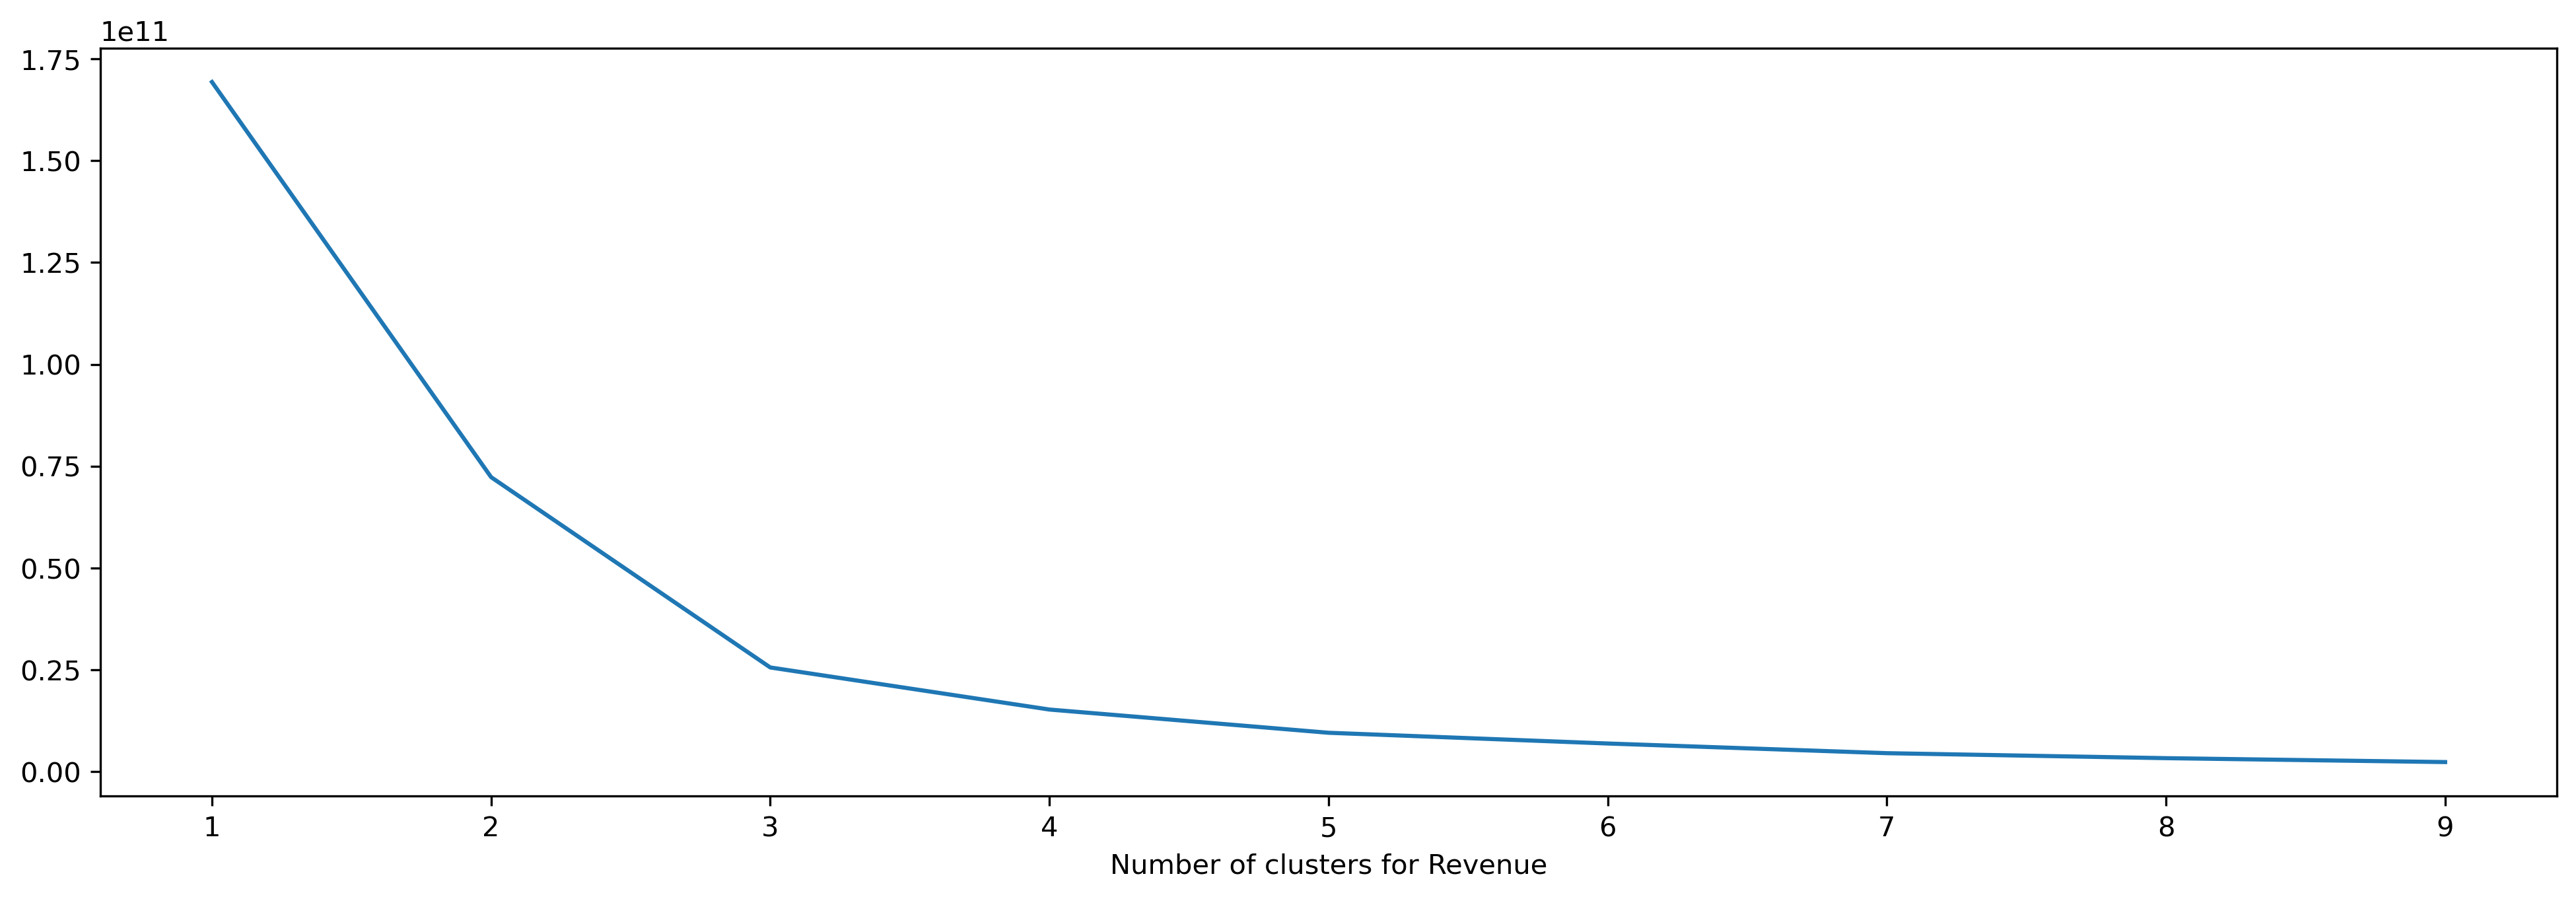

In [133]:
plt.figure(figsize=(16,5), dpi=300)
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters for Revenue")

In [134]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']]) 



In [135]:
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)

In [136]:
tx_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3921.0,1316.258790,2054.745461,-4287.63,280.52,621.66,1487.80,21535.90
1,27.0,43070.445185,15939.249588,25748.35,28865.49,36351.42,53489.79,88125.38
2,2.0,221960.330000,48759.481478,187482.17,204721.25,221960.33,239199.41,256438.49


In [137]:
tx_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,17850.0,301,0,34,1,5288.63,0
1,13093.0,266,0,12,1,7741.47,0
2,13047.0,31,2,17,1,3079.10,0
3,15291.0,25,2,20,1,4596.51,0
4,14688.0,7,2,27,1,5107.38,0


## 4.4 Overall Segmentation


In [138]:
tx_user['OverallScore'] = (tx_user['RecencyCluster']) + tx_user['FrequencyCluster'] + (tx_user['RevenueCluster'])


In [139]:
round(tx_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean(),1)

,Recency,Frequency,Revenue
OverallScore,,,
0,293.7,1.5,362.7
1,153.7,2.5,644.7
2,33.3,3.9,1151.9
3,12.7,19.5,5771.0
4,4.5,44.1,38902.3
5,7.2,106.8,82491.6


The scoring above clearly shows us that customers with **score 5 are our best customers** whereas **0 is the worst**.

To keep things simple, better we name these scores:

**0 to 1:** Low Value

**2 to 3:** Mid Value

**4 to 5:** High Value overall score before segmentation

In [140]:
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>1,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>3,'Segment'] = 'High-Value'

In [141]:

tx_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,17850.0,301,0,34,1,5288.63,0,1,Low-Value
1,13093.0,266,0,12,1,7741.47,0,1,Low-Value
2,13047.0,31,2,17,1,3079.10,0,3,Mid-Value
3,15291.0,25,2,20,1,4596.51,0,3,Mid-Value
4,14688.0,7,2,27,1,5107.38,0,3,Mid-Value


Text(0.5, 1.0, 'Customer Segments: Revenue and Recency')

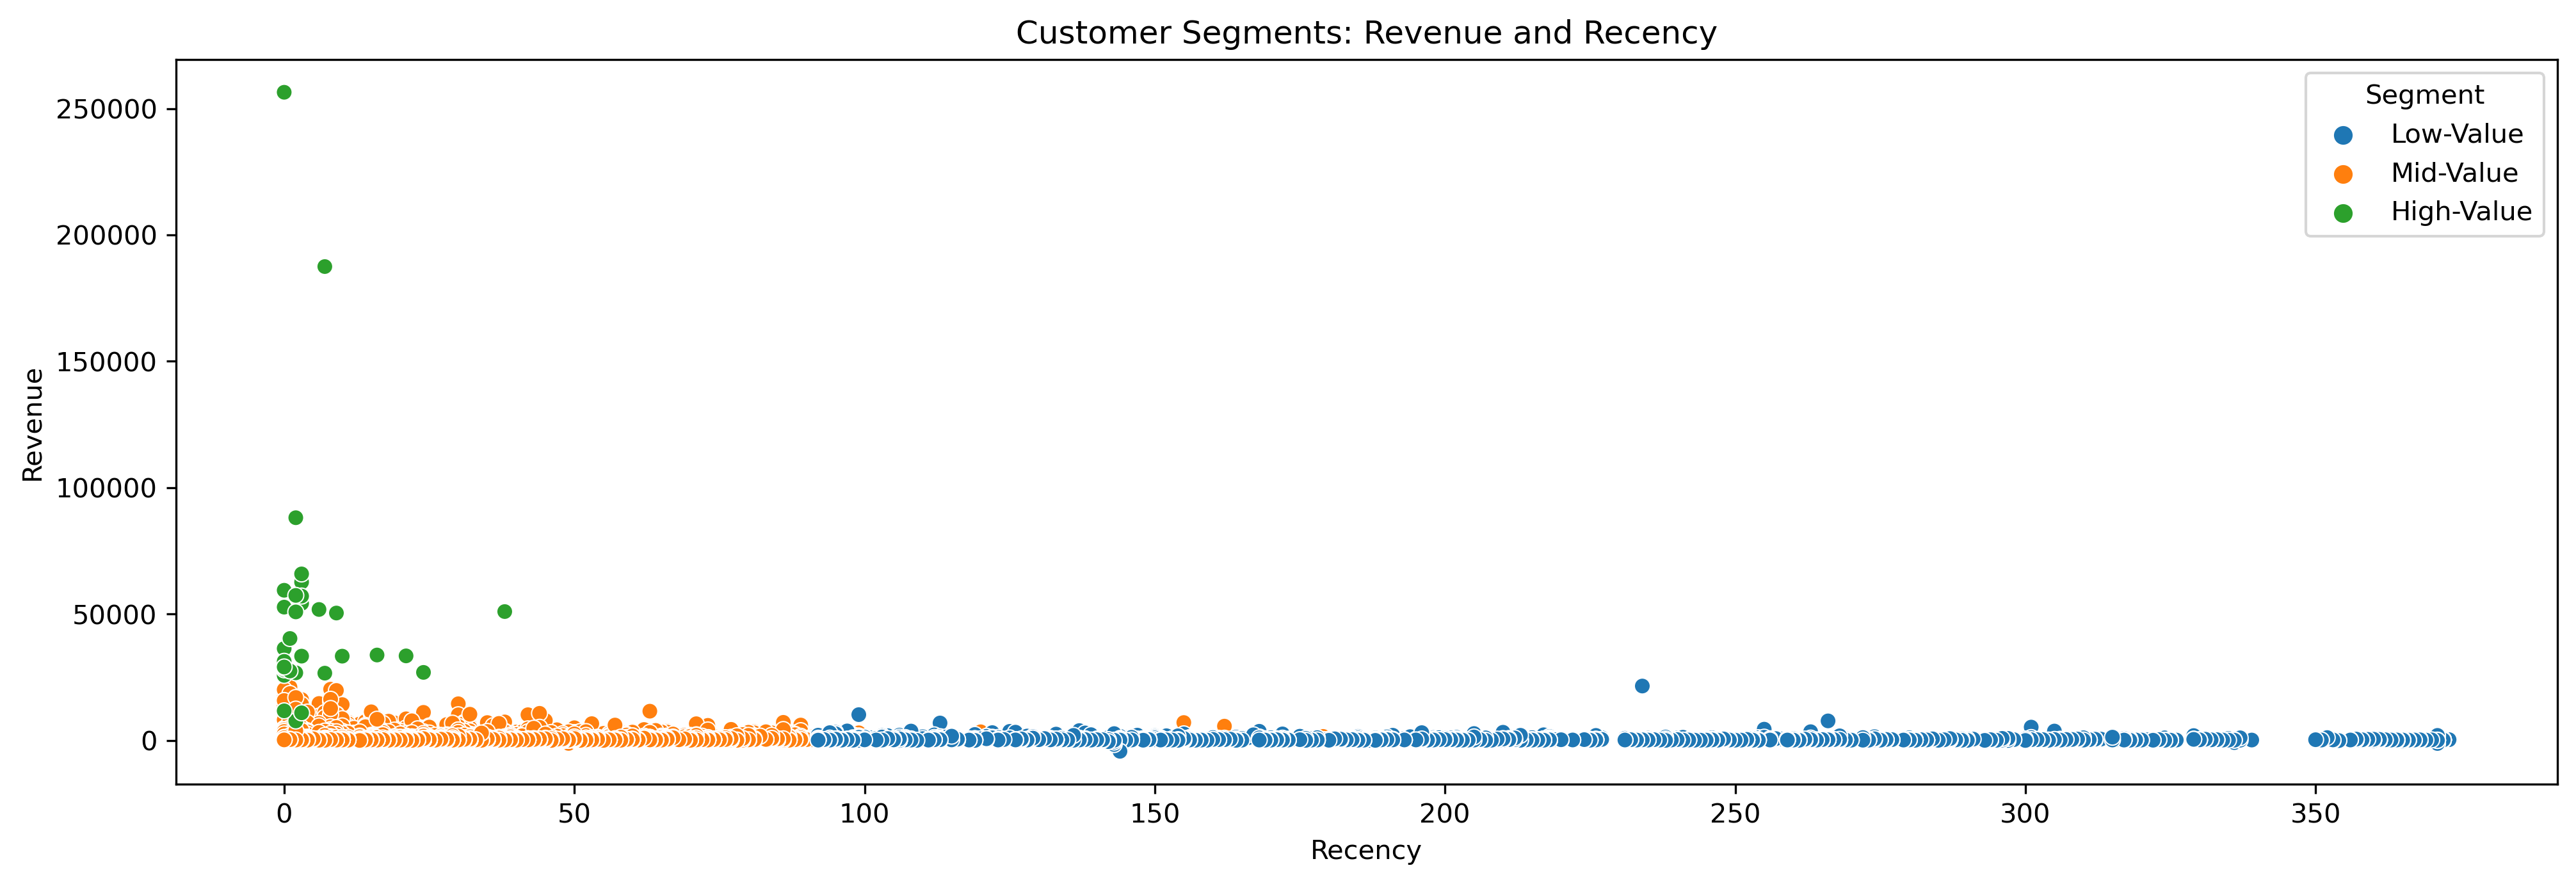

In [142]:
plt.figure(figsize=(16,5), dpi=300)
sns.scatterplot(data=tx_user, x="Recency", y="Revenue", hue="Segment")
plt.title('Customer Segments: Revenue and Recency')

Text(0.5, 1.0, 'Customer Segments: Revenue and Frequency')

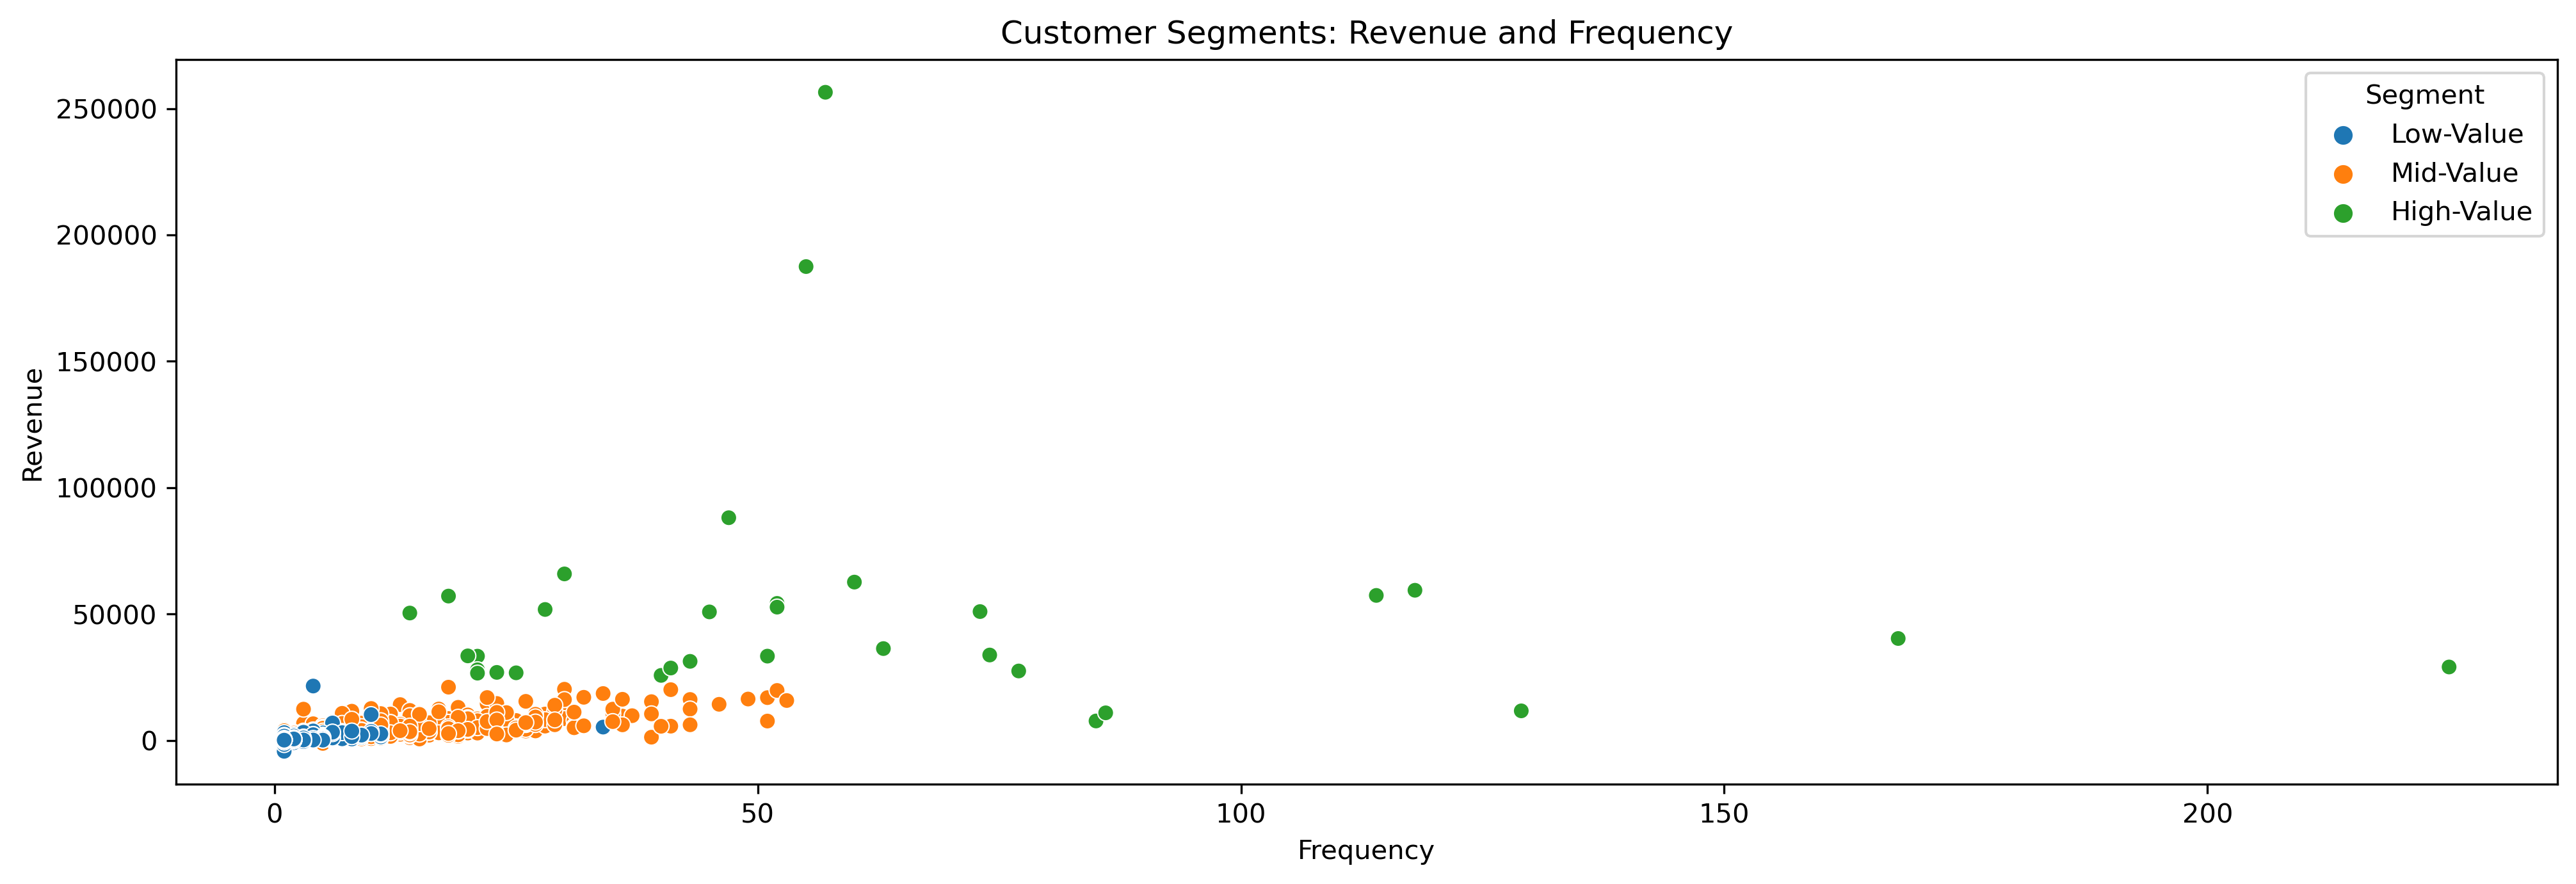

In [143]:
plt.figure(figsize=(16,5), dpi=300)
sns.scatterplot(data=tx_user, x="Frequency", y="Revenue", hue="Segment")
plt.title('Customer Segments: Revenue and Frequency')

Text(0.5, 1.0, 'Customer Segments: Recency and Frequency')

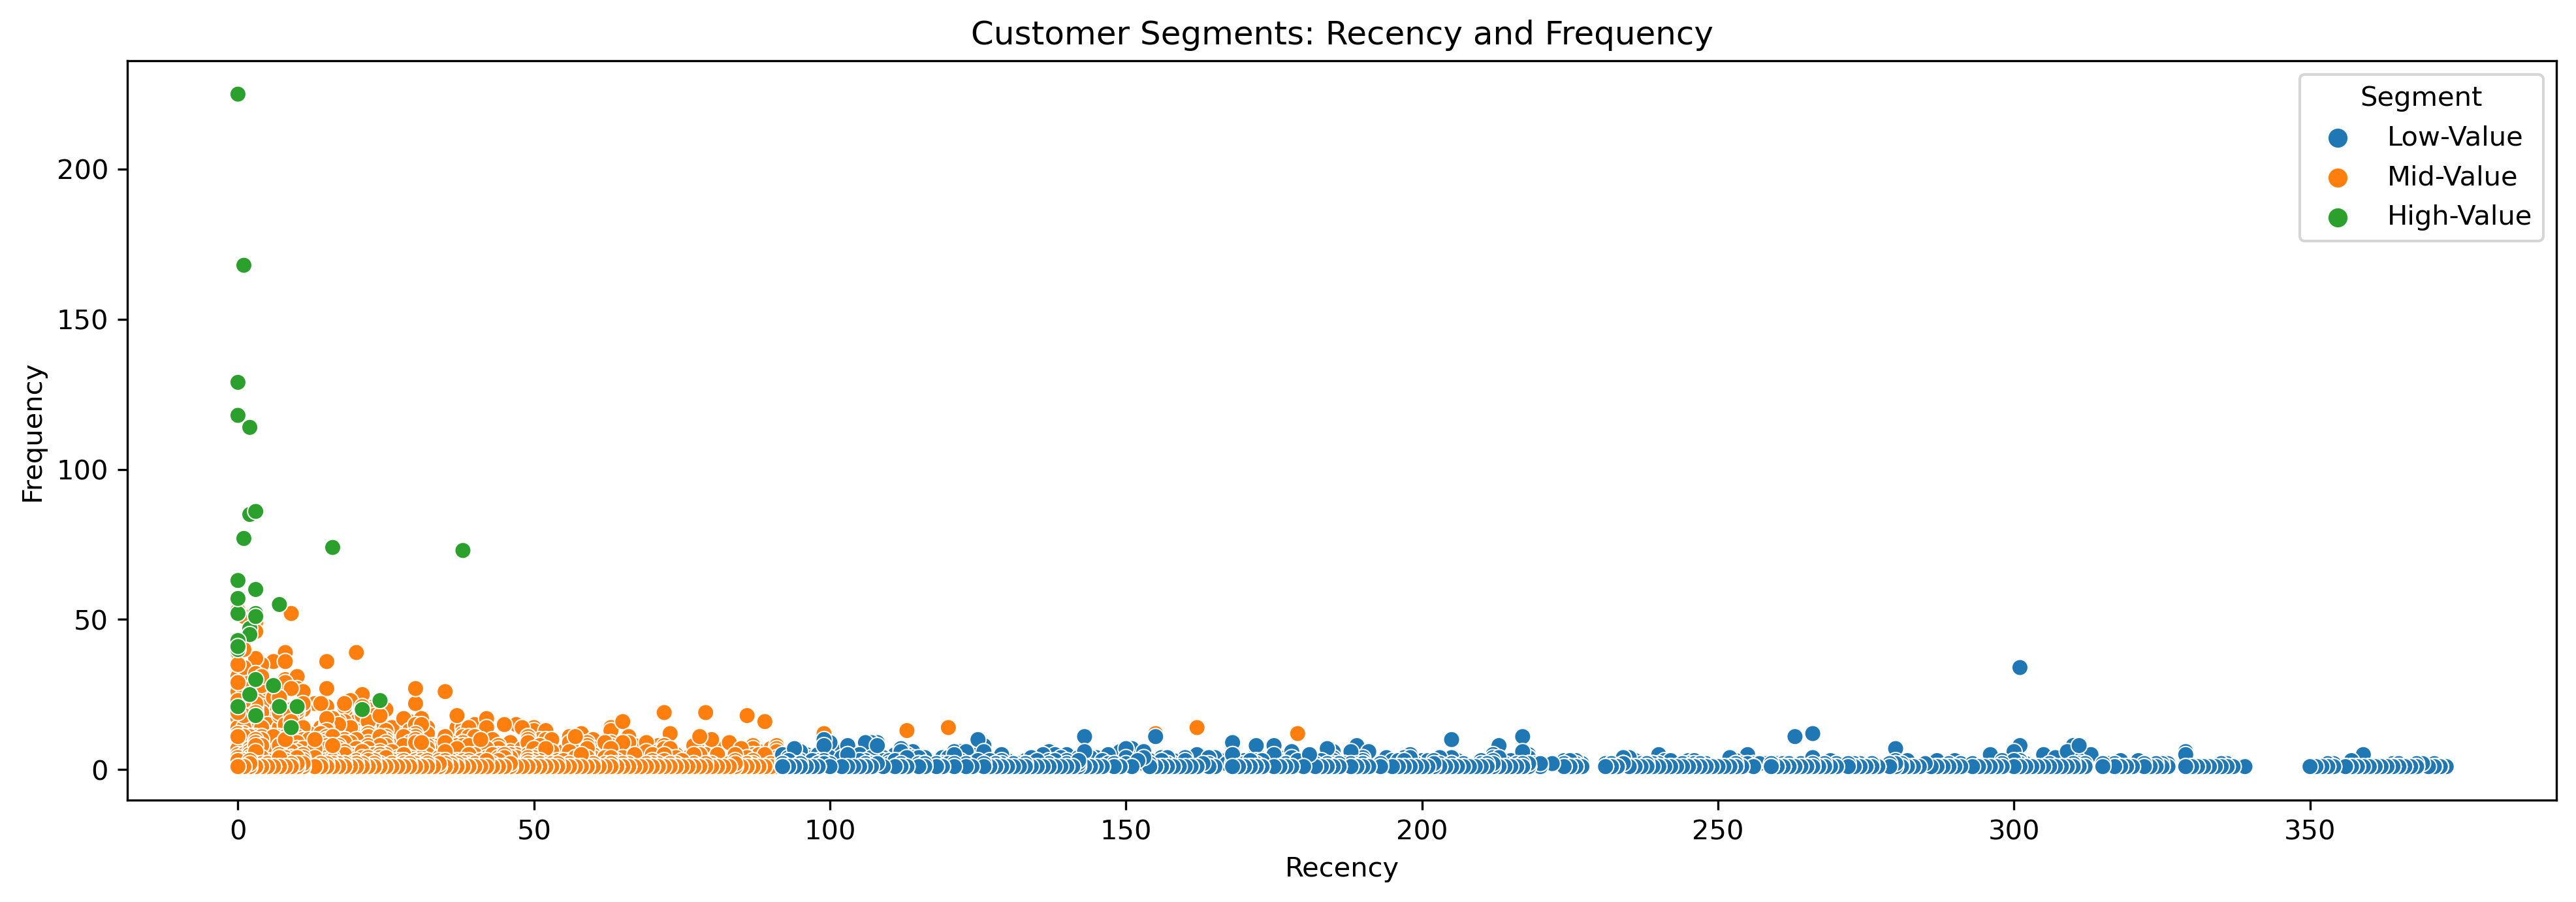

In [144]:
plt.figure(figsize=(16,5), dpi=300)
sns.scatterplot(data=tx_user, x="Recency", y="Frequency", hue="Segment")
plt.title('Customer Segments: Recency and Frequency')

## 4.5 Recommendation

Customer Segment | Task | Action Plan
------------ | ------------- | -------------
High-value | Improve retention rate| Advertise new items and reward them, they are the best-customers.
Mid-value | Improve retention and frequency rate | Introduce discounts, new pricing plans and customer loyalty programs.
Low-value | Improve frequency| New advertisement strategy + discount plans.
